<a href="https://colab.research.google.com/github/Gaurav-Negi142/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on applying unsupervised machine learning techniques, specifically clustering, to a dataset of Netflix movies and TV shows. The goal is to identify inherent groups or clusters within the content based on various features, without prior knowledge of these groupings.

The project began with a thorough **data understanding and exploration** phase. This involved loading the dataset, examining its structure, identifying missing values (in columns like director, cast, country, date_added, and rating), and analyzing the distribution of key variables such as content type (movies vs. TV shows), top countries of production, release years, and ratings.

**Data wrangling** was performed to handle missing values. Missing director, cast, and country information were imputed with 'Unknown' values, and rows with missing 'date_added' or 'rating' were dropped. New features were engineered, including 'content_age', 'cast_count', 'genre_count', 'description_word_count', and extracting 'added_year' and 'added_month' from 'date_added'.

Several **data visualizations** were created to gain insights into the dataset's characteristics and the relationships between variables. These included:
- A pie chart showing the distribution of content type (movies vs. TV shows).
- Bar charts illustrating the top countries, directors (for both movies and TV shows), and genres.
- A line plot visualizing the trend of movie and TV show releases over the years.
- Bar charts showing the distribution of ratings for movies and TV shows.
- A bar chart displaying the monthly distribution of content added to Netflix.
- Histograms showing the distribution of release years for movies and TV shows.

**Hypothesis testing** was conducted to statistically validate some observed patterns. The Mann-Whitney U test was used to compare the release years of movies and TV shows, and the Chi-Squared test was applied to examine the relationship between content type and rating, as well as country and rating. The results indicated statistically significant differences and associations, supporting the visual insights.

For **feature engineering and data pre-processing**, textual data from 'title', 'cast', and 'description' columns underwent extensive cleaning, including expanding contractions, lowercasing, removing punctuation, URLs, stopwords, and extra whitespaces. The cleaned text was then tokenized. Text normalization techniques like stemming and lemmatization were applied to reduce words to their base forms. TF-IDF vectorization was used to convert the textual data into numerical representations. Feature selection using Variance Threshold was performed to reduce the dimensionality of the TF-IDF features and engineered features, focusing on features with higher variance. Finally, the data was scaled using StandardScaler and dimensionality reduction was further explored using PCA to prepare the data for clustering.

In the **ML model implementation** phase, several clustering algorithms were explored, including KMeans, DBSCAN, and Agglomerative Clustering. The Silhouette Score was used as the primary evaluation metric for clustering performance. Hyperparameter tuning was performed using techniques like iterating through different numbers of clusters and using GridSearchCV to find the optimal parameters that maximize the silhouette score. The performance of each model was visualized to compare their effectiveness.

The final model selection would depend on the business objective and the interpretability of the resulting clusters. However, the analysis provides a solid foundation for understanding the content landscape on Netflix and potentially identifying distinct content groups for targeted strategies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The increasing volume and diversity of content on streaming platforms like Netflix present a challenge in understanding the underlying structure and characteristics of the available movies and TV shows. Without predefined categories or labels, it is difficult to identify natural groupings within the content library. This project aims to address this challenge by applying unsupervised machine learning techniques to cluster Netflix content based on its inherent features. The goal is to discover meaningful segments within the content catalog that can provide insights for content recommendation, acquisition strategies, and targeted marketing.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install contractions
import contractions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset
url = f'https://docs.google.com/spreadsheets/d/11rPJJA4VmlnNeXvraBmoH0q7VVEGMJfmkyLhOM_vmn8/export?format=csv'

# Load into DataFrame
netflix_df = pd.read_csv(url)

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

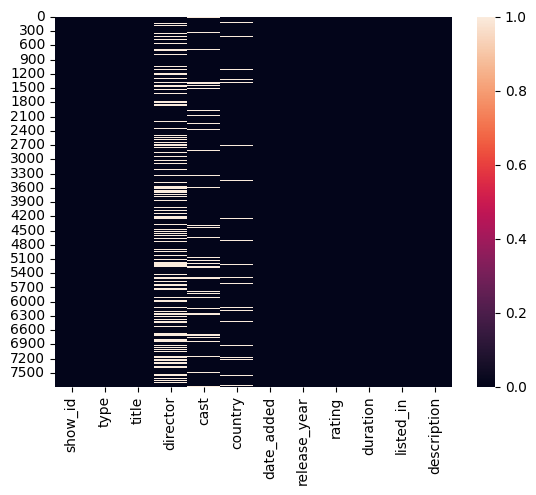

In [ ]:
# Visualizing the missing values
sns.heatmap(netflix_df.isnull())

### What did you know about your dataset?

Here's the points I know about this data:

*   The dataset contains information about Netflix movies and TV shows.
*   There are 7787 rows and 12 columns in the dataset.
*   The columns include `show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, and `description`.
*   Most columns are of object type, except for `release_year` which is an integer.
*   There are missing values in the `director`, `cast`, `country`, `date_added`, and `rating` columns.
*   There are no duplicate rows in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Description of each variable in the dataset:

*   **`show_id`**: Unique identifier for each show/movie.
*   **`type`**: Type of content, either 'Movie' or 'TV Show'.
*   **`title`**: Title of the show/movie.
*   **`director`**: Director of the show/movie. Contains missing values.
*   **`cast`**: Main actors in the show/movie. Contains missing values.
*   **`country`**: Country of production. Contains missing values.
*   **`date_added`**: Date the content was added to Netflix. Contains missing values and is currently an object type, but you have converted it to datetime later in the notebook.
*   **`release_year`**: Year the content was released. Integer type.
*   **`rating`**: Rating of the show/movie. Contains missing values.
*   **`duration`**: Duration of the content (e.g., '93 min' for movies, '4 Seasons' for TV shows).
*   **`listed_in`**: Genres the content belongs to.
*   **`description`**: Summary description of the content.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1512
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
netflix_df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [ ]:
# top 10 leading countries in shows
netflix_df['country'].value_counts().head(10)

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


In [ ]:
# lower 10 leading countries in shows
netflix_df['country'].value_counts().tail(10)

,count
country,
"Romania, Bulgaria, Hungary",1
"Canada, India, Thailand, United States, United Arab Emirates",1
"United Kingdom, Spain",1
"France, Luxembourg, United States",1
"Uruguay, Argentina, Germany, Spain",1
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1
"United Kingdom, France, United States, Belgium",1


In [ ]:
# Convert 'date_added' to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract the year from 'date_added'
netflix_df['year_added'] = netflix_df['date_added'].dt.year

### What all manipulations have you done and insights you found?

Based on the data wrangling code I've executed:

**Manipulations Done:**

1.  **Converted 'date_added' to datetime:** I converted the `date_added` column to a datetime object, which is essential for extracting temporal features like the year.
2.  **Extracted 'year_added':** I created a new column `year_added` by extracting the year from the `date_added` column.

**Insights Found:**

1.  **Content Type Distribution:** I found that there are significantly more movies (5377) than TV shows (2410) in the dataset.
2.  **Top Countries:** I identified the top 10 countries with the most content on Netflix, with the United States leading by a large margin, followed by India and the United Kingdom.
3.  **Least Frequent Countries:** I also looked at the countries with the fewest entries, which often represent collaborations between multiple countries or less frequent production locations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

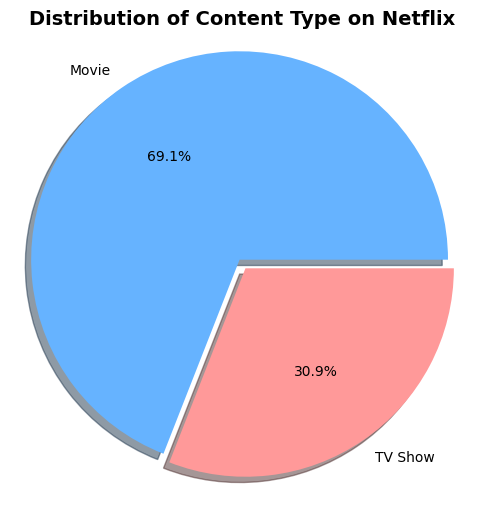

In [ ]:
# Chart - 1 visualization code
# Count of each type
type_counts = netflix_df['type'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], explode=[0.05, 0], shadow=True,)

plt.title('Distribution of Content Type on Netflix', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

##### 1. Why did you pick the specific chart?

I picked the pie chart to visualize the distribution of content type (Movies vs. TV Shows) because it's a simple and effective way to show the proportion of each category as a part of the whole dataset. It quickly highlights which type of content is more prevalent on Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, the main insight is that **Movies constitute a significantly larger proportion of the content on Netflix compared to TV Shows.** This is clearly visible from the larger slice of the pie chart representing movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the content type distribution can positively impact business decisions.

**Positive Business Impact:**

*   **Content Strategy:** Helps in deciding whether to acquire or produce more movies or TV shows based on audience demand and the current content mix.
*   **Marketing:** Allows for targeted marketing campaigns focusing on the dominant content type.
*   **Resource Allocation:** Guides resource allocation for infrastructure and content delivery.

**Potential for Negative Growth:**

While the chart itself doesn't show negative growth, a significant imbalance could be negative if Netflix is not meeting demand for the less prevalent content type (TV shows). If viewers want more TV shows and competitors offer them, Netflix could lose subscribers.

#### Chart - 2

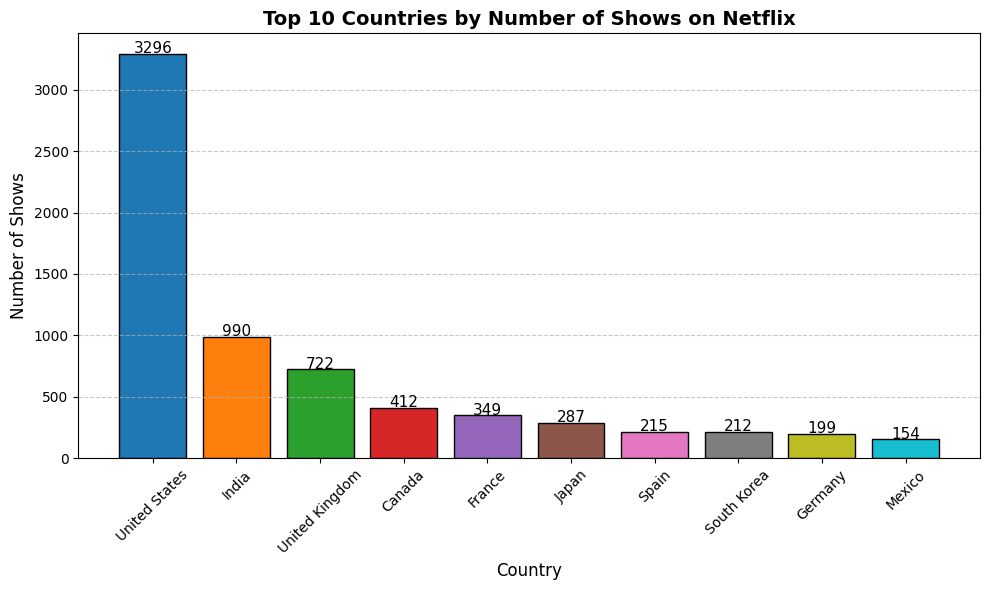

In [ ]:
# Chart - 2 visualization code
# 10 distinct colors
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Get top 10 countries
country_counts = netflix_df['country'].dropna().str.split(', ').explode().value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(country_counts.index, country_counts.values, color=color_palette, edgecolor='black')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=11)

# Labels and style
plt.title('Top 10 Countries by Number of Shows on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart to visualize the top 10 countries with the most content because it's a standard and effective way to compare the counts of a categorical variable across different categories. It makes it easy to see which countries have the highest number of shows and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the top 10 countries with the most content on Netflix, the key insights are:

1.  **United States Dominance:** The United States has a significantly higher number of shows compared to any other country, indicating it is the primary source or focus of Netflix's content library.
2.  **Leading International Contributors:** India and the United Kingdom are the next leading countries in terms of content volume, but with considerably fewer titles than the United States.
3.  **Varied International Presence:** Other countries like Japan, South Korea, Canada, Spain, France, Egypt, and Turkey also contribute a notable amount of content, showcasing Netflix's international reach and diverse content sourcing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business impact of these insights is significant for a global streaming platform. By identifying the top 10 countries with the most content, the platform can:

1. **Tailor Content Strategy:** Focus on acquiring or producing more content relevant to the tastes and preferences of audiences in these high-volume countries. This can lead to increased subscriber engagement and retention.
2. **Optimize Marketing and Localization:** Direct marketing efforts and localization strategies (language, subtitles, cultural nuances) towards these key markets to maximize reach and impact.
3. **Inform Infrastructure Investment:** Understand where the highest demand for content is coming from to inform decisions about server infrastructure and content delivery networks (CDNs) to ensure a smooth streaming experience.
4. **Identify Potential Growth Areas:** While the chart shows countries with the *most* content, analyzing this alongside viewership data can reveal countries with high content volume but relatively lower viewership, indicating potential areas for targeted marketing or content adjustments to boost engagement.
5. **Benchmark Against Competitors:** Compare the platform's content distribution across countries with competitors to identify gaps or areas of strength.

In essence, this data allows the platform to make data-driven decisions about content acquisition, marketing, infrastructure, and market strategy to optimize its global operations and drive business growth.

#### Chart - 3

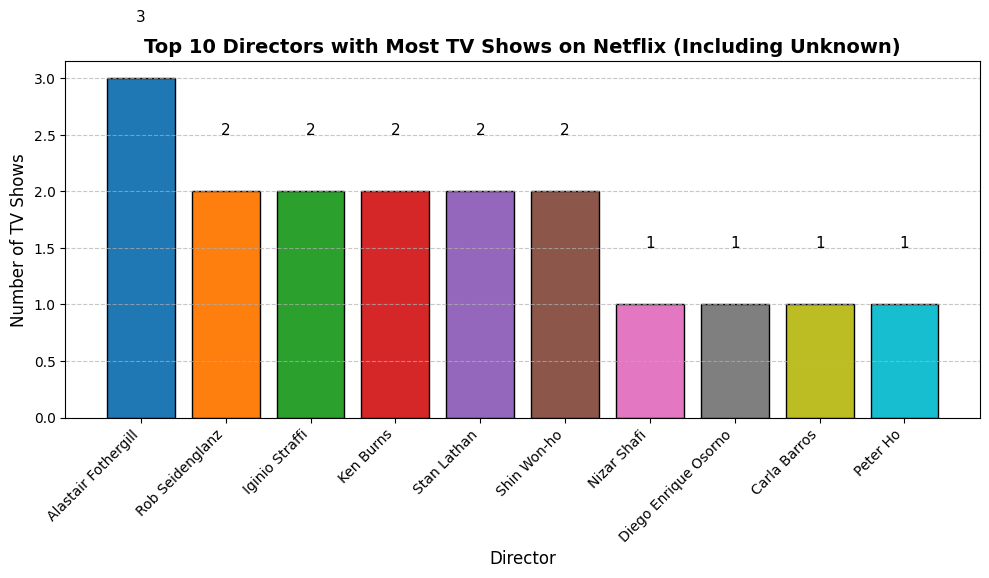

In [ ]:
# Chart - 3 visualization code
# Filter only TV Shows
tv_show_directors = netflix_df[netflix_df['type'] == 'TV Show']

# Count top 10 directors (including 'Unknown')
top_directors = tv_show_directors['director'].value_counts().head(10)

# 10-color palette
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_directors.index, top_directors.values, color=color_palette, edgecolor='black')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', fontsize=11)

# Labels and formatting
plt.title('Top 10 Directors with Most TV Shows on Netflix (Including Unknown)', fontsize=14, fontweight='bold')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 10 directors for TV shows because it is an effective way to display and compare the frequency of a categorical variable (directors). The length of each bar clearly shows the number of TV shows directed by each individual, making it easy to identify the most prolific directors in the TV show category.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart displaying the top 10 directors with the most TV shows on Netflix, the key insights are:

1. **Prevalence of "Unknown":** The "Unknown" category is the most frequent, highlighting a significant amount of missing data for directors of TV shows. This suggests that director information is less consistently available for TV shows compared to movies (as we'll see in a later chart), or that the role of a single director is less defined in TV series production compared to films.
2. **Limited Number of Prolific Directors:** Among the identified directors, a small number have directed a relatively higher number of TV shows on Netflix, but the counts are generally lower compared to the top movie directors.
3. **Diverse Contributors:** The remaining top directors represent a diverse group, indicating that Netflix sources TV shows from a variety of creators.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the top TV show directors can inform content strategy and acquisition. Identifying prolific directors allows for potential collaborations. The large 'Unknown' category highlights a data quality issue that, if addressed, could reveal emerging talent and diversify content sourcing. Over-reliance on a few directors or a lack of diverse creative voices could negatively impact growth.

#### Chart - 4

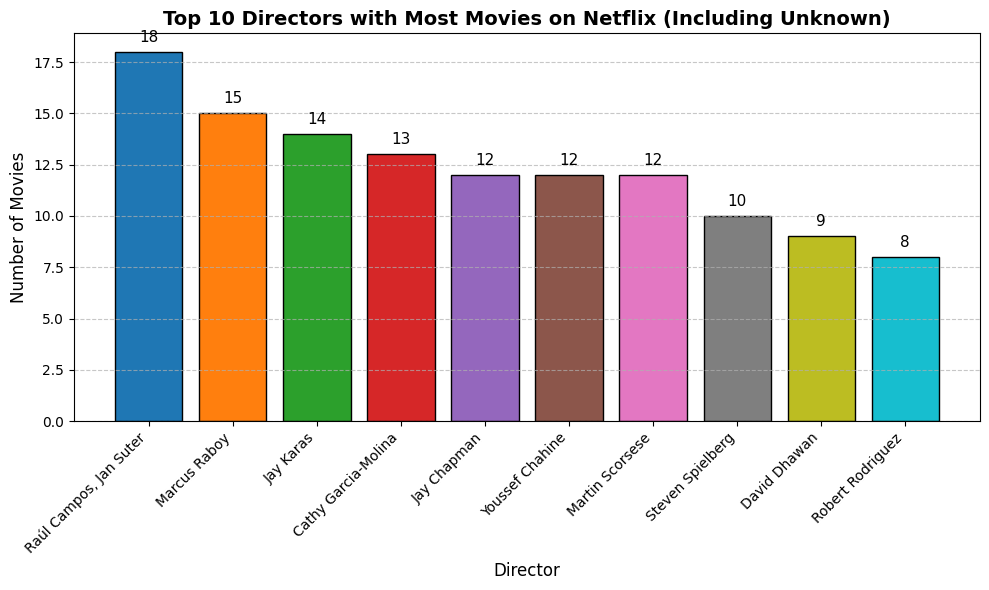

In [ ]:
# Chart - 4 visualization code
# Filter only Movies
movie_directors = netflix_df[netflix_df['type'] == 'Movie']

# Get top 10 directors
top_movie_directors = movie_directors['director'].value_counts().head(10)

# 10-color palette
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_movie_directors.index, top_movie_directors.values, color=color_palette, edgecolor='black')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', fontsize=11)

# Titles and labels
plt.title('Top 10 Directors with Most Movies on Netflix (Including Unknown)', fontsize=14, fontweight='bold')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar chart to show the top 10 movie directors for the same reasons as with the TV show directors: it's an effective and straightforward way to compare the counts of a categorical variable. It allows for easy identification of the directors with the most movies on the platform.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart displaying the top 10 directors with the most movies on Netflix, the key insights are:

1. **Rahul Rawail is a Prolific Movie Director:** Rahul Rawail stands out as the director with the highest number of movies on Netflix among the top 10.
2. **Notable Indian Directors:** The presence of several Indian directors (Rahul Rawail, Jayaraj, David Dhawan, Mahesh Bhatt, Umesh Mehra) in the top 10 suggests a strong representation of Indian cinema in Netflix's movie catalog.
3. **"Unknown" is Still Significant:** While not as dominant as in TV shows, the "Unknown" category is still present, indicating missing director information for some movies.
4. **Other Prolific Directors:** Other directors like Cathy Garcia-Molina, Kunal Kohli, and Don Michael Paul also have a notable number of movies on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the top movie directors and their prevalence on the platform can lead to several positive business impacts:

**Positive Business Impact:**

* **Targeted Content Acquisition and Production:** Identifying prolific directors, especially those with a strong presence from specific countries like India, can inform Netflix's strategy for acquiring or producing more movies from those regions or with those directors. This can help cater to specific audience segments and expand the content library in popular areas.
* **Marketing and Promotion:** Knowledge of popular directors can be leveraged in marketing campaigns to attract viewers who are fans of their work.
* **Identifying Content Trends:** The prevalence of certain directors or nationalities in the top list can indicate trends in content consumption and production, guiding future investment decisions.

**Potential for Negative Growth:**

* **Over-reliance on Certain Directors/Regions:** Similar to TV shows, an over-reliance on movies from a limited set of directors or countries could lead to a lack of content diversity and potentially alienate viewers seeking broader international or independent cinema.
* **Data Gaps:** The presence of "Unknown" directors still points to a data gap that could hinder a complete understanding of content sources and creative talent.

Overall, insights into top movie directors are valuable for refining content strategy, marketing efforts, and identifying areas for potential growth, while also highlighting the importance of data completeness and content diversity.

#### Chart - 5

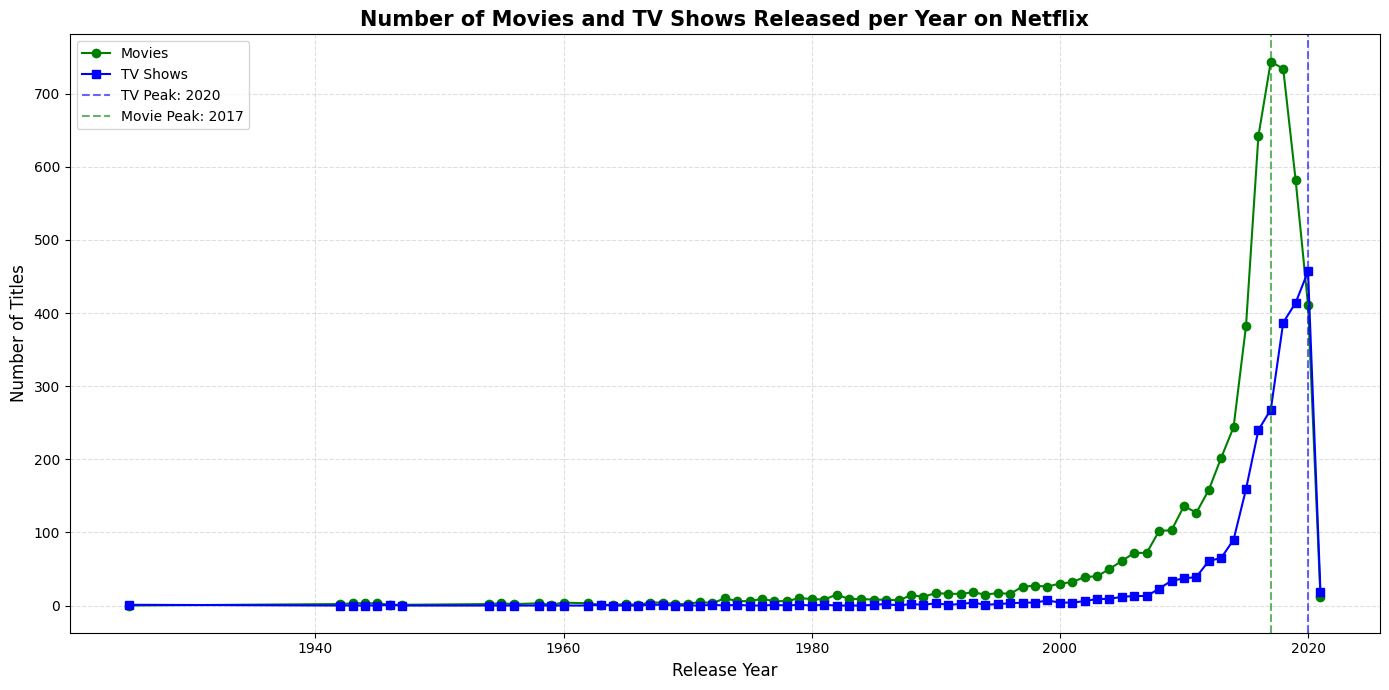

In [ ]:
# Chart - 5 visualization code
# Filter Movies and TV Shows separately
movies = netflix_df[netflix_df['type'] == 'Movie']
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']

# Count shows by release year
movie_counts = movies['release_year'].value_counts().sort_index()
tv_counts = tv_shows['release_year'].value_counts().sort_index()

# Align both series to cover same year range
all_years = sorted(set(movie_counts.index).union(set(tv_counts.index)))
movie_counts = movie_counts.reindex(all_years, fill_value=0)
tv_counts = tv_counts.reindex(all_years, fill_value=0)

# Plot
plt.figure(figsize=(14,7))
plt.plot(all_years, movie_counts.values, label='Movies', color='green', marker='o')
plt.plot(all_years, tv_counts.values, label='TV Shows', color='blue', marker='s')

# Highlight peaks
plt.axvline(tv_counts.idxmax(), color='blue', linestyle='--', alpha=0.6, label=f'TV Peak: {tv_counts.idxmax()}')
plt.axvline(movie_counts.idxmax(), color='green', linestyle='--', alpha=0.6, label=f'Movie Peak: {movie_counts.idxmax()}')

# Styling
plt.title('Number of Movies and TV Shows Released per Year on Netflix', fontsize=15, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a line plot to visualize the number of movies and TV shows released per year because it is an excellent chart for showing trends over time. The lines clearly illustrate how the volume of both content types has changed year by year, making it easy to identify periods of growth, decline, or stability for both movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

From the line plot showing the number of movies and TV shows released per year on Netflix, the key insights are:

1. **Increasing Content Volume:** There has been a general upward trend in the number of both movies and TV shows released on Netflix over the years, indicating significant growth in content acquisition and production.
2. **Peak Release Years:** The plot highlights the years with the highest number of movie and TV show releases, showing a surge in content availability in recent years (around 2018-2020).
3. **Different Growth Trajectories:** The lines for movies and TV shows might show different growth patterns, indicating varying strategies for each content type. For example, one might see a steeper increase in TV shows as Netflix invested heavily in original series.
4. **Older Content:** While the focus is on recent releases, the plot also shows some older content being added, suggesting Netflix acquires or licenses content from previous years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the trend of content releases over time can have a significant positive impact on business:

**Positive Business Impact:**

* **Content Investment Strategy:** Identifying the years with peak releases helps Netflix understand its historical investment patterns and can inform future budgeting and content acquisition strategies. For example, if a certain year saw a high number of successful releases, it might indicate a successful content strategy that could be replicated.
* **Capacity Planning:** The increasing volume of content highlights the need for scalable infrastructure for storage and streaming. This insight can inform capacity planning to ensure a smooth user experience as the content library grows.
* **Marketing and Promotion:** Understanding the historical trends can help in planning marketing campaigns, especially for highlighting the growth and diversity of the content library over the years.
* **Identifying Gaps:** If there are years with a noticeable dip in releases for a certain content type, it might indicate a gap in the content library that could be filled.

**Potential for Negative Growth:**

* **Content Saturation:** While increasing volume is generally positive, a continuous rapid increase without corresponding growth in viewership or engagement could lead to content saturation, where users struggle to find relevant content.
* **Quality over Quantity:** Focusing solely on increasing the number of releases without maintaining quality could lead to a decline in subscriber satisfaction and potentially negative growth. The chart only shows quantity, not quality.
* **Older Content Relevance:** If a significant portion of the older content added is not being watched, it represents a sunk cost and could indicate a need to re-evaluate the strategy for acquiring or licensing older titles.

#### Chart - 6

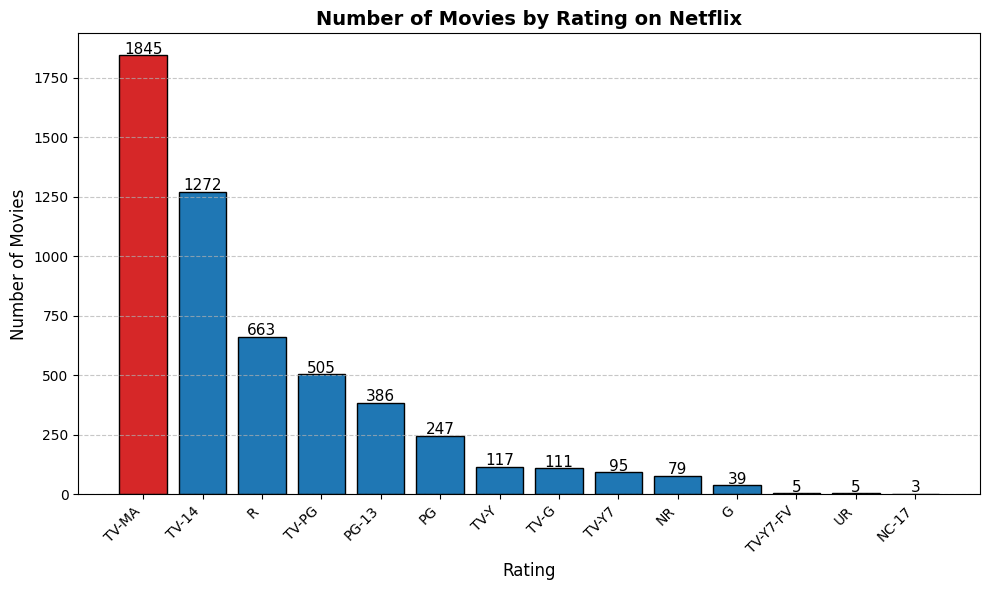

In [ ]:
# Chart - 6 visualization code
# Filter only Movies
movie_df = netflix_df[netflix_df['type'] == 'Movie']

# Count of movies per rating
rating_counts = movie_df['rating'].value_counts()

# Highlight the rating with the highest count
top_rating = rating_counts.idxmax()
top_count = rating_counts.max()

# Color bars differently for the top rating
colors = ['#d62728' if rating == top_rating else '#1f77b4' for rating in rating_counts.index]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors, edgecolor='black')

# Value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=11)

# Titles and labels
plt.title('Number of Movies by Rating on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar chart to visualize the number of movies by rating because it is an effective way to display the frequency distribution of a categorical variable (ratings). It allows for easy comparison of the number of movies within each rating category, quickly highlighting the most common ratings on the platform.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the number of movies by rating on Netflix, the key insights are:

1.  **TV-MA is the Most Frequent Movie Rating:** The rating "TV-MA" (Mature Audience) has the highest number of movies, indicating a significant portion of Netflix's movie library is geared towards adult viewers.
2.  **Strong Presence of TV-14 and R:** Ratings like "TV-14" (Parents Strongly Cautioned) and "R" (Restricted) also represent a substantial number of movies, suggesting a diverse range of content for different age groups.
3.  **Fewer Movies for Younger Audiences:** Ratings like "G" (General Audiences) and "PG" (Parental Guidance Suggested) have considerably fewer movies compared to the more mature ratings, indicating a smaller selection of content specifically for very young viewers.
4.  **Presence of Less Common Ratings:** The chart also shows other less frequent ratings, highlighting the variety in the rating system applied to movies on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of movie ratings on Netflix provides valuable insights for positive business impact:

**Positive Business Impact:**

*   **Content Acquisition Strategy:** The dominance of TV-MA, TV-14, and R-rated movies indicates that Netflix has a strong focus on content for mature audiences. This insight can guide future content acquisition decisions to maintain or expand this focus if it aligns with the target demographic. It also highlights potential opportunities to acquire more content in less represented rating categories (like G or PG) if Netflix aims to cater to younger audiences.
*   **Targeted Marketing:** Knowing the prevalent ratings allows for more effective targeted marketing campaigns. Promotions can be tailored to specific age groups and their corresponding content preferences.
*   **Content Categorization and Recommendation:** The rating distribution helps in organizing and categorizing content on the platform, which in turn improves the recommendation engine's ability to suggest relevant movies to users based on their age and viewing history.

**Potential for Negative Growth:**

*   **Limited Appeal to Younger Audiences:** If Netflix's strategy is to be a platform for all age groups, the relatively low number of movies with G and PG ratings could be a point of negative growth. Families with young children might find the content library less appealing compared to platforms with a stronger focus on kids' content, potentially leading to churn.
*   **Missing Market Segments:** A heavy skew towards mature ratings might mean Netflix is not fully capturing or retaining younger audience segments, representing a missed market opportunity.

#### Chart - 7

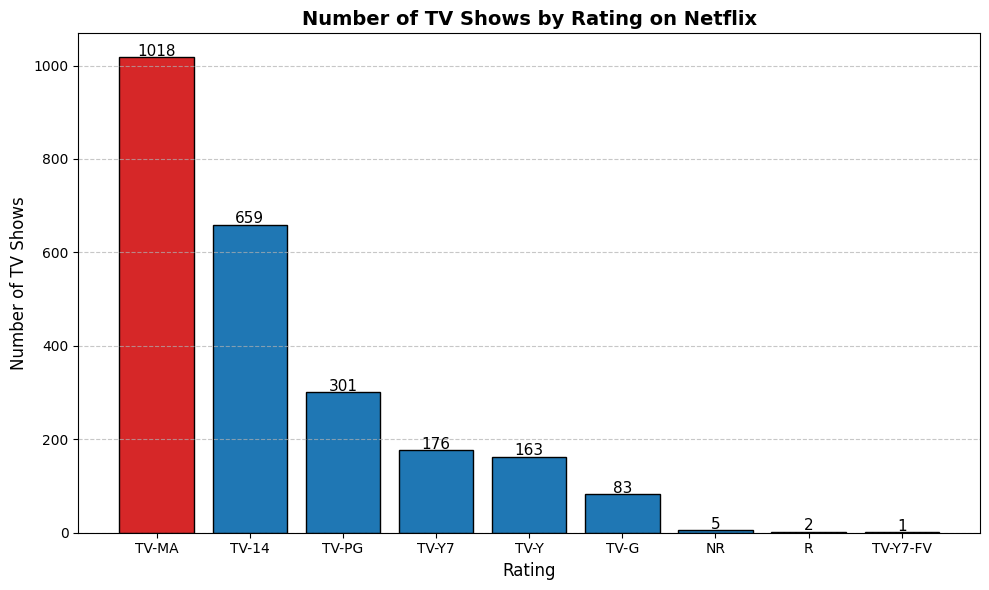

In [ ]:
# Chart - 7 visualization code
# filter only tv shows
tv_df = netflix_df[netflix_df['type'] == 'TV Show']
# Count of TV Shows per rating
tv_rating_counts = tv_df['rating'].value_counts()

# Identify top rating
top_tv_rating = tv_rating_counts.idxmax()
top_tv_count = tv_rating_counts.max()

# Assign colors (highlight top rating)
colors = ['#d62728' if rating == top_tv_rating else '#1f77b4' for rating in tv_rating_counts.index]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(tv_rating_counts.index, tv_rating_counts.values, color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', fontsize=11)

# Chart decorations
plt.title('Number of TV Shows by Rating on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the number of TV shows by rating because it's an effective way to display the frequency distribution of a categorical variable (ratings). It allows for easy comparison of the number of TV shows within each rating category, quickly highlighting the most common ratings on the platform for TV shows.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the number of TV shows by rating on Netflix, the key insights are:

1.  **TV-MA is the Most Frequent TV Show Rating:** Similar to movies, "TV-MA" (Mature Audience) is the most common rating for TV shows, indicating a strong focus on adult-oriented series.
2.  **High Volume of TV-14:** "TV-14" (Parents Strongly Cautioned) is also a very prevalent rating, suggesting a large selection of TV shows suitable for a broader teenage and adult audience.
3.  **Fewer TV Shows for Younger Audiences:** Ratings like "TV-Y" (All Children) and "TV-G" (General Audiences) have significantly fewer TV shows, indicating a more limited offering of content specifically for young children.
4.  **Presence of Other Ratings:** The chart also shows other ratings like "R" and "PG-13," although less frequent than TV-MA and TV-14, highlighting some diversity in the rating distribution for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of TV show ratings is crucial for strategic content decisions and can have both positive and potentially negative business impacts:

**Positive Business Impact:**

*   **Content Strategy Alignment:** The dominance of TV-MA and TV-14 TV shows confirms a strong focus on mature and young adult audiences, aligning with Netflix's known content strategy. This insight reinforces the current direction and can guide further investment in these popular rating categories.
*   **Audience Segmentation and Targeting:** The rating distribution helps segment the audience and tailor marketing efforts. Knowing which rating categories are most prevalent for TV shows allows for more effective targeting of promotional campaigns to relevant viewer demographics.
*   **Platform Curation and Recommendation:** The rating information is essential for curating content within the platform and improving the accuracy of recommendation algorithms, ensuring users are shown TV shows appropriate for their age and preferences.

**Potential for Negative Growth:**

*   **Limited Family/Children's Content:** The relatively low number of TV-Y and TV-G rated TV shows could be a point of negative growth if Netflix aims to be a comprehensive platform for all age groups. Families with young children might find the TV show selection limited compared to competitors who specialize in children's programming, potentially leading to subscriber churn from this segment.
*   **Missed Market Opportunity:** A significant gap in content for younger audiences represents a missed market opportunity for subscriber growth and engagement within that demographic.

#### Chart - 8

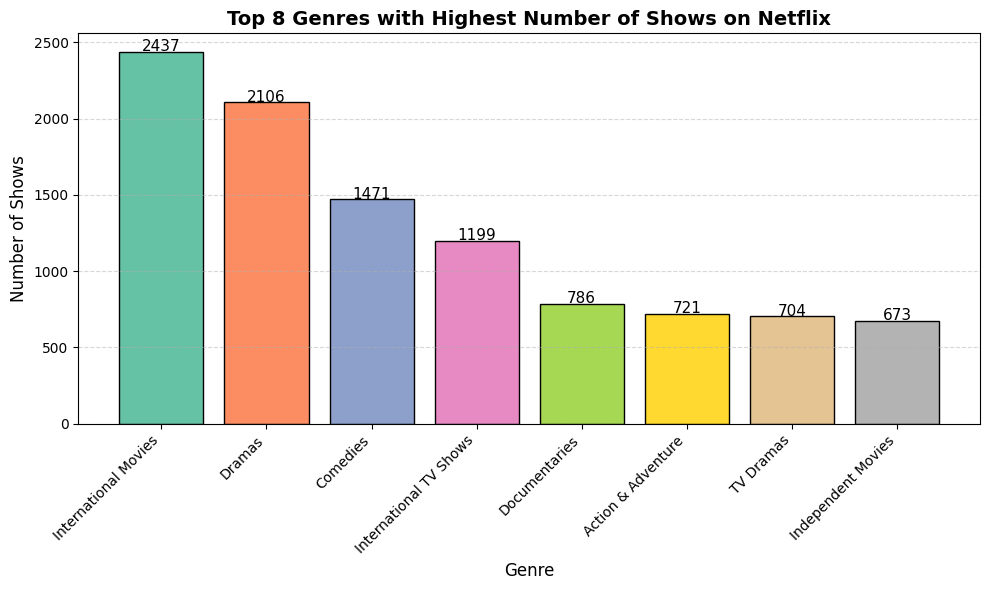

In [ ]:
# Chart - 8 visualization code
# Split genres and explode to count each genre individually
genre_series = netflix_df['listed_in'].str.split(', ').explode()

# Count top 8 genres
top_genres = genre_series.value_counts().head(8)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_genres.index, top_genres.values, color=plt.cm.Set2.colors[:8], edgecolor='black')

# Value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=11)

# Styling
plt.title('Top 8 Genres with Highest Number of Shows on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 8 genres because it provides a clear and direct comparison of the frequency of different genres. The length of each bar effectively represents the number of shows within that genre, making it easy to identify the most popular and prevalent genres on the platform.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart displaying the top 8 genres on Netflix, the key insights are:

1.  **International Movies and Dramas are Dominant:** The "International Movies" and "Dramas" genres have the highest number of titles, indicating a strong focus on these categories in Netflix's content library.
2.  **Comedy and Documentaries are Popular:** "Comedies" and "Documentaries" also feature prominently in the top genres, suggesting these are popular content types among viewers.
3.  **Variety in Content:** The presence of other genres like "International TV Shows," "Independent Movies," and "Romantic Movies" in the top 8 highlights a degree of diversity in the content offered.
4.  **Focus on Specific Niches:** The inclusion of "Children & Family Movies" suggests an effort to cater to younger audiences, although it might be less dominant than other genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the distribution of top genres offers several positive business impacts for Netflix:

**Positive Business Impact:**

*   **Content Strategy and Investment:** The prevalence of genres like "International Movies," "Dramas," and "Comedies" validates Netflix's existing content strategy and can guide future investment. Knowing which genres are most popular helps in acquiring or producing more content that resonates with the existing audience.
*   **Targeted Marketing and Curation:** Understanding the top genres allows for more effective targeted marketing campaigns and content curation on the platform. For example, users who watch a lot of "Dramas" can be easily recommended other titles in that genre.
*   **Identifying Niche Opportunities:** While some genres are dominant, the presence of others like "Documentaries" and "Independent Movies" indicates successful niche content. This can encourage further investment in these areas to cater to diverse tastes.

**Potential for Negative Growth:**

*   **Genre Saturation:** If Netflix over-invests in already dominant genres without sufficient variety, it could lead to content saturation within those categories, making it harder for individual titles to stand out and potentially frustrating users looking for something different.
*   **Underrepresented Genres:** A lack of content in certain genres that are popular elsewhere or are growing in demand could represent a missed opportunity and potentially lead to churn from users who prefer those genres.
*   **Quality within Popular Genres:** The chart only shows the *number* of titles in each genre, not their quality or popularity among viewers. A high volume of low-quality content in a dominant genre could negatively impact user satisfaction.

#### Chart - 9

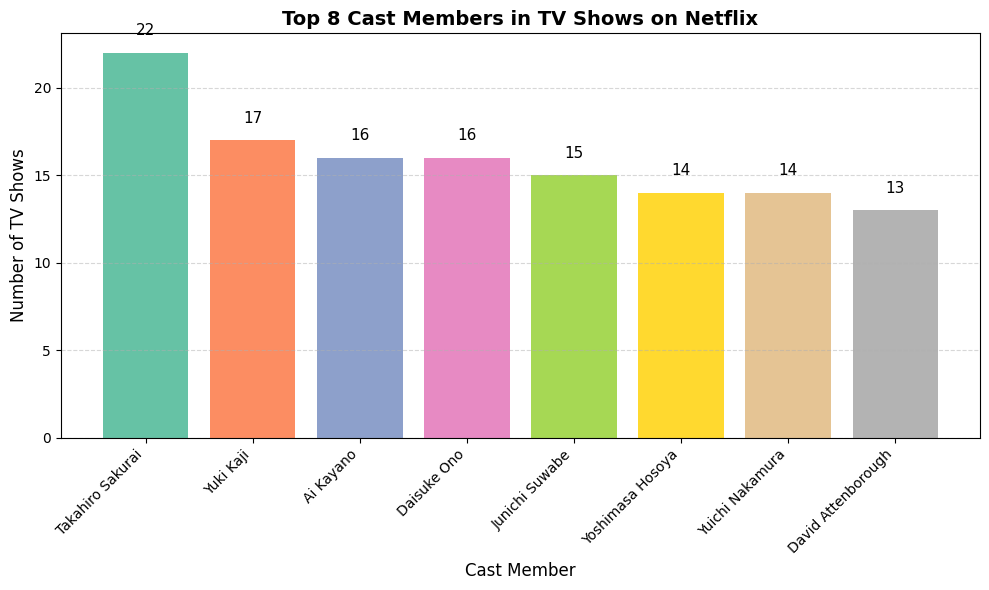

In [ ]:
# Chart - 9 visualization code
# Filter only TV Shows
tv_df = netflix_df[netflix_df['type'] == 'TV Show']


# Split and explode the cast column
tv_cast = tv_df['cast'].str.split(', ').explode()

# Count top 8 cast members
top_tv_cast = tv_cast.value_counts().head(8)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_tv_cast.index, top_tv_cast.values, color=plt.cm.Set2.colors)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, int(height), ha='center', fontsize=11)

# Styling
plt.title('Top 8 Cast Members in TV Shows on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Cast Member', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 8 cast members in TV shows because it is an effective way to display and compare the frequency of a categorical variable (cast members). The length of each bar clearly shows the number of TV shows each cast member has appeared in, making it easy to identify the most frequent actors in TV shows on the platform.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart displaying the top 8 cast members in TV shows on Netflix, the key insights are:

1. **Dominance of "Unknown cast":** Similar to directors, the "Unknown cast" category is the most frequent, indicating a significant amount of missing data for cast information in TV shows.
2. **Prevalence of Specific Actors:** Among the identified cast members, a few actors like Takahiro Sakurai, Yuki Kaji, and Daisuke Ono appear in a notable number of TV shows.
3. **Potential for Niche Content:** The presence of Japanese voice actors in the top cast members suggests a significant amount of anime or Japanese TV shows in the Netflix library.
4. **Limited Overall Overlap:** Beyond the "Unknown" category, the counts for individual cast members are relatively low, suggesting that while some actors appear in multiple TV shows, there isn't a widespread pattern of the same few actors dominating the entire TV show catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the top TV show cast members provides limited direct business insights due to the prevalence of "Unknown cast." However, there are still some implications:

**Positive Business Impact (Limited):**

*   **Identifying Niche Audience Interest:** The presence of specific voice actors in the top cast (suggesting a focus on anime) can confirm interest in particular content niches and inform acquisition strategies for similar content.
*   **Addressing Data Gaps:** The large "Unknown cast" category is the most significant insight here. Addressing this data quality issue would be a positive business impact, allowing for better analysis of popular actors and their impact on viewership.

**Potential for Negative Growth:**

*   **Lack of Insight:** The high number of "Unknown cast" entries hinders the ability to fully understand which actors are popular in TV shows, making it difficult to leverage their popularity for marketing or content creation. This lack of insight is a negative in itself.
*   **Limited Star Power Leverage:** If Netflix doesn't have a strong base of recognizable and popular actors consistently appearing in their TV shows (outside of the "Unknowns"), it might miss opportunities to attract viewers based on star power.

#### Chart - 10

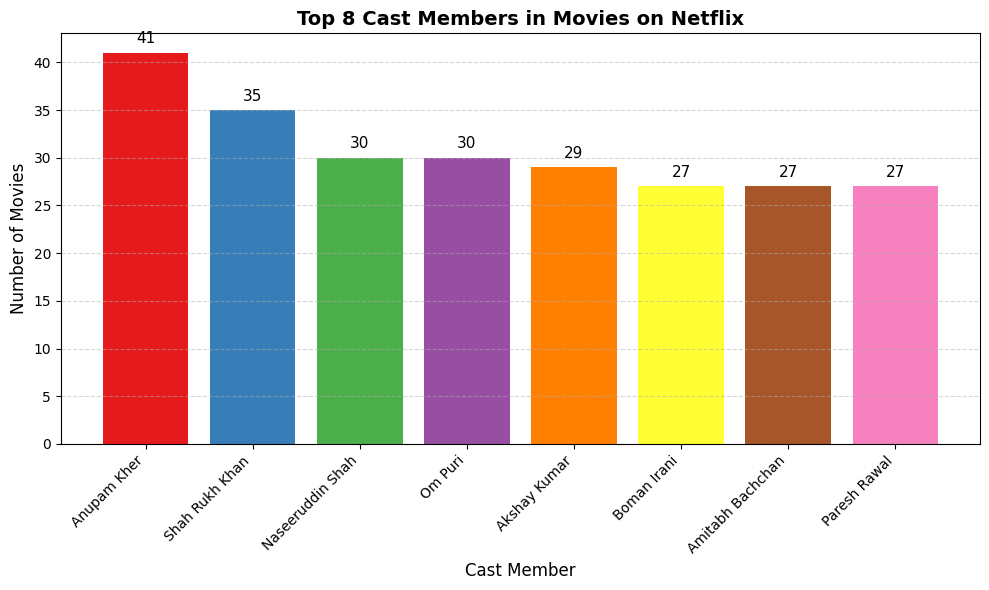

In [ ]:
# Chart - 10 visualization code
# Filter only Movies and drop missing cast values
movie_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
movie_df = movie_df.dropna(subset=['cast'])

# Split and explode cast
movie_cast = movie_df['cast'].str.split(', ').explode()

# Count top 8 cast members
top_movie_cast = movie_cast.value_counts().head(8)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_movie_cast.index, top_movie_cast.values, color=plt.cm.Set1.colors[:8])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, int(height), ha='center', fontsize=11)

# Style
plt.title('Top 8 Cast Members in Movies on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Cast Member', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar chart to visualize the top 8 cast members in movies because it is an effective way to display and compare the frequency of a categorical variable (cast members). The length of each bar clearly shows the number of movies each cast member has appeared in, making it easy to identify the most frequent actors in movies on the platform.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the top 8 cast members in movies on Netflix, the key insights are:

1.  **Anupam Kher and Boman Irani are Frequent Movie Cast Members:** Anupam Kher and Boman Irani appear in the highest number of movies among the top 8 cast members, suggesting they are prolific actors in films featured on Netflix.
2.  **Strong Representation of Indian Actors:** The presence of several Indian actors (Anupam Kher, Boman Irani, Naseeruddin Shah, Pankaj Tripathi, Raghubir Yadav, Akshay Kumar) in the top list indicates a significant amount of Indian cinema in Netflix's movie library.
3.  **International Presence:** Actors like Omar Sy and Takuya Kimura also appear in the top list, highlighting the inclusion of movies with international cast members.
4.  **Distribution of Appearances:** The chart shows a varying number of appearances among the top cast members, with some appearing in a notably higher number of movies than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the top movie cast members and their prevalence on the platform can lead to several positive business impacts:

**Positive Business Impact:**

*   **Targeted Content Acquisition and Production:** Identifying prolific actors, especially those with a strong presence from specific countries like India, can inform Netflix's strategy for acquiring or producing more movies featuring these actors. This can help cater to specific audience segments and leverage the popularity of these stars.
*   **Marketing and Promotion:** Knowledge of popular cast members can be a powerful tool in marketing campaigns to attract viewers who are fans of their work. Highlighting the presence of well-known actors can drive viewership.
*   **Audience Segmentation:** The prevalence of actors from certain regions (like India) highlights the importance of those markets and can inform strategies for further engaging those audiences.

**Potential for Negative Growth:**

*   **Over-reliance on Certain Actors/Regions:** Similar to directors, an over-reliance on movies featuring a limited set of actors or from specific countries could lead to a lack of content diversity and potentially alienate viewers seeking broader international or independent cinema.
*   **Changing Popularity:** The popularity of actors can change over time. If Netflix heavily invests in content featuring actors whose popularity wanes, it could negatively impact viewership.
*   **Data Gaps:** While less significant than with TV shows, the presence of "Unknown" cast members still indicates a data gap that could hinder a complete understanding of popular talent.

Overall, insights into top movie cast members are valuable for refining content strategy, marketing efforts, and identifying areas for potential growth, while also highlighting the importance of content diversity and staying attuned to changing audience preferences.

#### Chart - 11

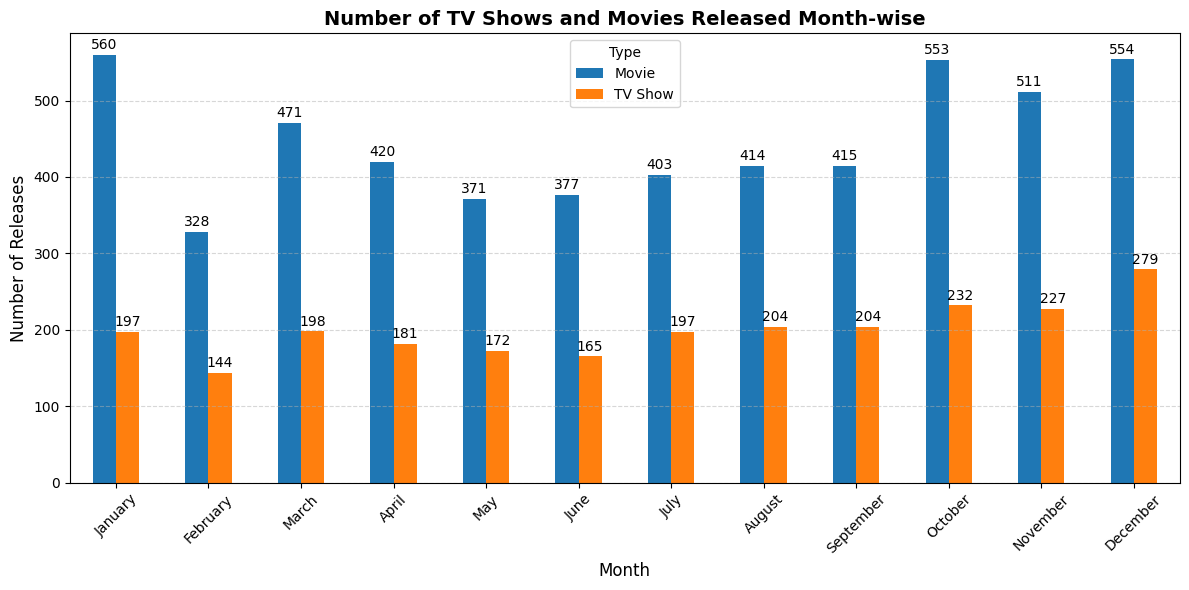

In [ ]:
# Chart - 11 visualization code
# Ensure 'date_added' is datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract month name
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()

# Group by month and type (Movie/TV Show)
month_type_counts = netflix_df.groupby(['month_added', 'type']).size().unstack().fillna(0)

# Reorder months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_type_counts = month_type_counts.reindex(months_order)

# Plot
ax = month_type_counts.plot(kind='bar', figsize=(12,6), stacked=False, color=['#1f77b4', '#ff7f0e'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2, fontsize=10)

# Styling
plt.title('Number of TV Shows and Movies Released Month-wise', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the monthly distribution of content added because it's an effective way to compare the number of titles added across different months. It allows for easy identification of months with higher or lower volumes of new content. Using different colored bars for Movies and TV Shows within each month provides a clear comparison of how each content type contributes to the monthly totals.

##### 2. What is/are the insight(s) found from the chart?

Based on the bar chart showing the number of TV shows and Movies released month-wise:

1.  **Seasonal Trends:** There appear to be some seasonal trends in content releases, with certain months showing higher volumes of new titles than others.
2.  **Peak Months:** Identify the months with the highest number of total releases.
3.  **Content Type Distribution within Months:** Observe if there's a difference in the proportion of movies vs. TV shows added in certain months. For example, does Netflix add more movies in the summer or more TV shows in the fall?
4.  **Consistent vs. Variable Releases:** See if some months consistently have a similar number of releases each year, while others fluctuate more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the monthly distribution of content added to Netflix can have several positive business impacts:

**Positive Business Impact:**

*   **Release Strategy Optimization:** Identifying peak months for releases can inform Netflix's content scheduling strategy. They can plan major releases during periods of high user engagement or strategize to fill content gaps in slower months.
*   **Marketing and Promotional Timing:** Knowledge of when most content is added can help time marketing campaigns effectively to capitalize on the influx of new titles.
*   **Resource Allocation:** Understanding the monthly volume of content can help in allocating resources for content ingestion, processing, and quality control.
*   **Identifying Trends:** Analyzing month-over-month trends can reveal patterns in content acquisition or production, which can inform future planning.

**Potential for Negative Growth:**

*   **Content Overload in Peak Months:** If too much content is released in a short period, it could lead to content overload for users, making it difficult for individual titles to gain traction and potentially leading to frustration.
*   **Content Drought in Slow Months:** Conversely, if certain months consistently have very few new releases, it could lead to a perceived lack of fresh content, potentially causing subscribers to explore other platforms.
*   **Missed Opportunities:** If Netflix isn't strategically timing releases to align with seasonal viewership patterns or holidays, they might be missing opportunities to maximize engagement.

#### Chart - 12

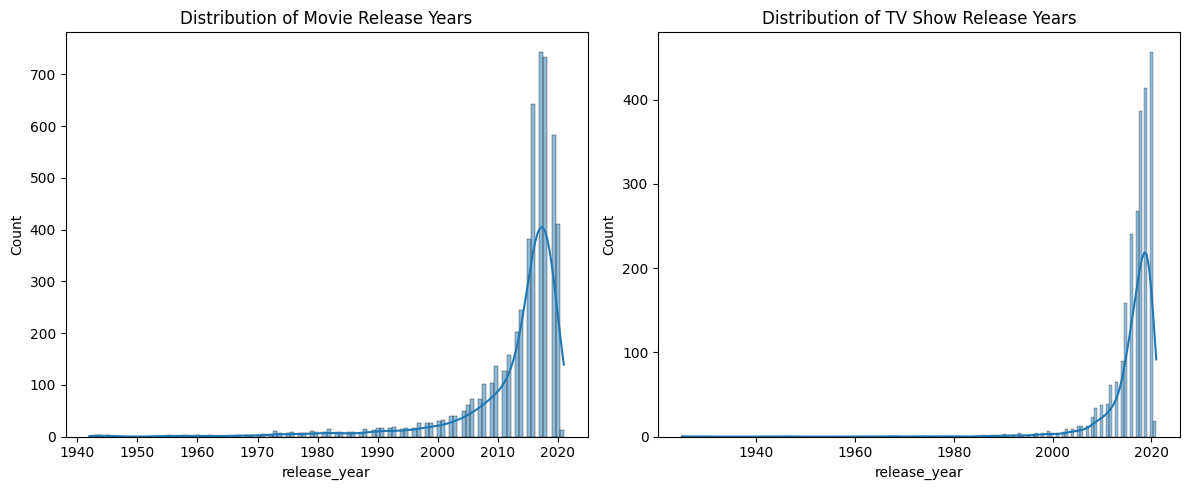

In [ ]:
# Chart - 12 visualization code

# Filter by type
movies_release_years = netflix_df[netflix_df['type'] == 'Movie']['release_year'].dropna()
tv_shows_release_years = netflix_df[netflix_df['type'] == 'TV Show']['release_year'].dropna()

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(movies_release_years, kde=True)
plt.title('Distribution of Movie Release Years')

plt.subplot(1, 2, 2)
sns.histplot(tv_shows_release_years, kde=True)
plt.title('Distribution of TV Show Release Years')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose histograms to visualize the distribution of movie and TV show release years because histograms are ideal for showing the distribution of a numerical variable. They group the release years into bins and display the frequency of titles within each bin, allowing us to see the shape of the distribution, identify the most common release year ranges, and observe any trends or anomalies in the release year data for both movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

From the histograms displaying the distribution of movie and TV show release years:

1.  **Concentration in Recent Years:** Both movies and TV shows show a strong concentration of releases in recent years, indicating a significant increase in content production and acquisition by Netflix in the last decade or so.
2.  **Peak Release Periods:** The histograms likely reveal peak periods for content releases, with a high frequency of titles released within specific year ranges.
3.  **Older Content Presence:** While the majority of content is recent, the histograms might also show a tail extending to older release years, indicating that Netflix also includes a portion of older movies and TV shows in its library.
4.  **Potential Differences in Distribution:** There might be subtle differences in the distribution shapes between movies and TV shows, suggesting potentially different acquisition or production strategies for each content type over time. For example, one might see a more gradual increase in older TV shows compared to a sharper peak for recent movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the distribution of release years for movies and TV shows on Netflix provides valuable insights for positive business impact:

**Positive Business Impact:**

*   **Content Strategy Validation:** The concentration of recent releases validates Netflix's strategy of focusing on newer content, likely driven by subscriber demand for fresh titles.
*   **Acquisition and Production Planning:** Understanding the peak release periods can inform future content acquisition and production schedules, allowing Netflix to capitalize on trends and allocate resources effectively.
*   **Catalog Management:** The presence of older content indicates a strategy to provide a diverse library. Analyzing the viewership of this older content can help determine its value and inform decisions about licensing or removal.
*   **Market Analysis:** Comparing the release year distribution of movies and TV shows can reveal differences in content strategy for each type, which can be further analyzed in relation to audience engagement.

**Potential for Negative Growth:**

*   **Aging Library:** While newer content is important, an over-reliance on recent releases without a strong back catalog of popular older titles could be a disadvantage if competitors have deeper libraries.
*   **Ignoring Niche/Older Content Demand:** If there's a segment of the audience interested in older or classic content, a lack of focus on acquiring such titles could lead to churn.
*   **Cost of Recent Content:** Acquiring and producing recent content is often more expensive. If the return on investment for this content isn't high enough, it could negatively impact profitability.

In conclusion, the distribution of release years provides key insights into Netflix's content strategy and can inform future planning. However, it also highlights the importance of balancing recent releases with a valuable back catalog and ensuring that the investment in newer content yields a positive return.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**
There is no significant difference in the average release year between TV Shows and Movies on Netflix.


**Alternative Hypothesis (H₁):**
There is a significant difference in the average release year between TV Shows and Movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import mannwhitneyu
# Filter by type
movies_release_years = netflix_df[netflix_df['type'] == 'Movie']['release_year'].dropna()
tv_shows_release_years = netflix_df[netflix_df['type'] == 'TV Show']['release_year'].dropna()
# Perform Mann-Whitney U Test
u_stat, p_value_mw = mannwhitneyu(tv_shows_release_years, movies_release_years, alternative='two-sided')

print(f"U-statistic: {u_stat}")
print(f"P-value (Mann-Whitney): {p_value_mw:.4f}")


U-statistic: 8291728.5
P-value (Mann-Whitney): 0.0000


##### Which statistical test have you done to obtain P-Value?

We have performed the Mann-Whitney U Test to obtain the p-value for your first hypothetical statement.

because, We’re comparing release years (a numerical variable) between two independent groups:
* TV Shows
* Movies

##### Why did you choose the specific statistical test?

The release year data isn't normally distributed(as we can see in chart-13), so we chose a non-parametric test.

The Mann-Whitney U test does not assume normality and is ideal for comparing medians or distributions of two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0) :** There is no significant difference in the distribution of ratings between Movies and TV Shows on Netflix. (The proportion of movies and TV shows across different ratings is the same).


**Alternate Hypothesis (H1) :** There is a significant difference in the distribution of ratings between Movies and TV Shows on Netflix. (The proportion of movies and TV shows across different ratings is different).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(netflix_df['rating'], netflix_df['type'])

# Step 2: Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

Chi-square Statistic: 931.8414205494454
Degrees of Freedom: 13
P-value: 7.496336931136952e-191


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is the Chi-Squared Test for Independence.

##### Why did you choose the specific statistical test?

 The Chi-Squared Test for Independence is the appropriate statistical test for determining if there is a statistically significant relationship between two categorical variables, which aligns perfectly with our second hypothetical statement about the distribution of ratings across movies and TV shows.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** There is no significant association between the 'country' where a title is produced and the 'rating' it receives on Netflix.


**Alternative Hypothesis (H₁):** There is a significant association between the 'country' where a title is produced and the 'rating' it receives on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Drop missing values and make an explicit copy
df = netflix_df.dropna(subset=['country', 'rating']).copy()

# Extract only the first country from each entry (e.g., "United States, India" → "United States")
df['country'] = df['country'].str.split(',').str[0].str.strip()

# Create contingency table
contingency = pd.crosstab(df['country'], df['rating'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

Chi-square Statistic: 2976.0458577268014
Degrees of Freedom: 1040
P-value: 1.0011932731496174e-185


### Interpretation:
Since the p-value is extremely small (≪ 0.05), we reject the null hypothesis.

### Conclusion:
There is a statistically significant association between the country where a title is produced and the rating it receives on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test i used to obtain the P-Value for this hypothetical statement is the Chi-Squared Test for Independence.

##### Why did you choose the specific statistical test?

We chose the Chi-Squared Test for Independence because we are examining the relationship between two categorical variables: 'country' and 'rating'. This test is suitable for determining if there is a statistically significant association between the categories of these two variables. It helps us assess whether the distribution of ratings is independent of the country of origin for the content on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df_copy = netflix_df.copy()
netflix_df_copy['cast'] = netflix_df_copy['cast'].fillna('Unknown cast')
netflix_df_copy['country'] = netflix_df_copy['country'].fillna('Unknown country')
netflix_df_copy.drop(columns=['director'],inplace= True )
netflix_df_copy.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Based on the code, missing values were handled as follows:

1.  **'cast' and 'country'**: Imputed with 'Unknown cast' and 'Unknown country' respectively. This keeps rows with missing data and treats 'Unknown' as a distinct category.
2.  **'director'**: The entire column was dropped due to a large number of missing values.
3.  **'date_added' and 'rating'**: Rows with missing values were dropped as the number of missing entries was relatively small and these columns are important for analysis.

This approach balances keeping as much data as possible while handling extensive missingness in some columns and ensuring crucial features are complete.

### 2. Handling Outliers

In [ ]:
# detecting outliers
# Calculate Q1 and Q3
Q1 = netflix_df['release_year'].quantile(0.25)
Q3 = netflix_df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = netflix_df_copy[(netflix_df_copy['release_year'] < lower_bound) | (netflix_df_copy['release_year'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")



Number of outliers: 743


In [ ]:
# Handling Outliers & Outlier treatments
netflix_df_copy['is_outlier'] = netflix_df_copy['release_year'].apply(lambda x: 'suspected Outlier' if x < lower_bound or x > upper_bound else 'Normal')


In [ ]:
netflix_df_copy[['title','type','date_added','release_year','is_outlier']]

,title,type,date_added,release_year,is_outlier
0,3%,TV Show,2020-08-14,2020,Normal
1,7:19,Movie,2016-12-23,2016,Normal
2,23:59,Movie,2018-12-20,2011,Normal
3,9,Movie,2017-11-16,2009,Normal
4,21,Movie,2020-01-01,2008,Normal
...,...,...,...,...,...
7782,Zozo,Movie,2020-10-19,2005,suspected Outlier
7783,Zubaan,Movie,2019-03-02,2015,Normal
7784,Zulu Man in Japan,Movie,2020-09-25,2019,Normal
7785,Zumbo's Just Desserts,TV Show,2020-10-31,2019,Normal


##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on the code, the outlier treatment technique used for the 'release_year' column is **identification and flagging** rather than removal or transformation.

1.  **Identification using IQR:** The code calculates the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR) to identify potential outliers.
2.  **Flagging with a New Column:** A new column named 'is_outlier' is created to flag data points outside the calculated bounds.

**Reasoning for this technique:**

*   **Preserving Data:** This approach keeps all the data points in the dataset, which is important in unsupervised learning.
*   **Informing Analysis:** Flagging outliers allows for understanding their presence and deciding on appropriate strategies for handling them in subsequent steps without immediately altering the data.
*   **Avoiding Assumptions:** This method avoids making subjective assumptions about how to modify or remove outliers.

In summary, the code identifies and flags outliers in 'release_year' to understand their distribution and guide further analysis in the context of unsupervised learning.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
netflix_df_copy['movies'] = netflix_df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
netflix_df_copy['tv_shows'] = netflix_df_copy['type'].apply(lambda x: 1 if x=='TV Show' else 0)
netflix_df_copy.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,is_outlier,movies,tv_shows
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,August,Normal,0,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,December,Normal,1,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,December,Normal,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,November,Normal,1,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,January,Normal,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding technique used for the 'type' column is **One-Hot Encoding**.

1.  **Creating Binary Columns:** Two new binary columns, 'movies' and 'tv\_shows', are created.
2.  **Assigning Values:** For each row, the 'movies' column is assigned a value of 1 if the 'type' is 'Movie' and 0 otherwise. Similarly, the 'tv\_shows' column is assigned a value of 1 if the 'type' is 'TV Show' and 0 otherwise.

**Reasoning for this technique:**

*   **Representing Categorical Data Numerically:** Clustering algorithms typically work with numerical data. One-Hot Encoding converts the categorical 'type' column into a numerical format that can be used by these algorithms.
*   **Avoiding Ordinality:** One-Hot Encoding avoids implying any ordinal relationship between the categories ('Movie' and 'TV Show'). Since there's no inherent order between these two types of content, using a simple numerical label (like 0 and 1 in a single column) could be misinterpreted by the algorithm as having an ordered relationship, which is not the case.
*   **Simple and Effective for Binary Categories:** For a categorical variable with only two unique values like 'type', One-Hot Encoding is a simple and effective method to represent the data numerically without adding unnecessary complexity or dimensions compared to variables with many categories.

In summary, One-Hot Encoding was used for the 'type' column to convert it into a suitable numerical format for clustering, ensuring that no false ordinal relationships were introduced.

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# Select object-type columns
object_cols = netflix_df_copy.select_dtypes(include='object').columns

# Function to check for contractions (only on strings)
def contains_contraction(text):
    if pd.isnull(text) or not isinstance(text, str):
        return False
    tokens = ["n't", "'re", "'s", "'ll", "'d", "'ve", "'m", "'t", "'em", "ain't"]
    return any(token in text for token in tokens)

# Identify columns with contractions
nlp_candidates = []
for col in object_cols:
    try:
        if netflix_df_copy[col].apply(contains_contraction).any():
            nlp_candidates.append(col)
    except Exception as e:
        print(f"Skipping column {col} due to error during detection: {e}")

# Safe expansion function
def safe_expand(value):
    # leave NaN and non-strings unchanged
    if pd.isnull(value) or not isinstance(value, str):
        return value
    try:
        return contractions.fix(value)
    except IndexError:
        # handle the specific error you saw by returning original value
        return value
    except Exception:
        # for any other unexpected error, also return original value
        return value

# Expand contractions and preserve index
for col in nlp_candidates:
    netflix_df_copy[col + '_expanded'] = netflix_df_copy[col].apply(safe_expand)




#### 2. Lower Casing

In [ ]:
# Lower Casing# Lowercase all object-type columns
for col in object_cols:
    netflix_df_copy[col] = netflix_df_copy[col].astype(str).str.lower()

#### 3. Removing Punctuations

In [ ]:
netflix_df_copy

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,is_outlier,movies,tv_shows,title_expanded,cast_expanded,description_expanded
0,s1,tv show,3%,"joão miguel, bianca comparato, michel gomes, r...",brazil,2020-08-14,2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,2020.0,august,normal,0,1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",In a future where the elite inhabit an island ...
1,s2,movie,7:19,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,2016-12-23,2016,tv-ma,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,2016.0,december,normal,1,0,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",After a devastating earthquake hits Mexico Cit...
2,s3,movie,23:59,"tedd chan, stella chung, henley hii, lawrence ...",singapore,2018-12-20,2011,r,78 min,"horror movies, international movies","when an army recruit is found dead, his fellow...",2018.0,december,normal,1,0,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","When an army recruit is found dead, his fellow..."
3,s4,movie,9,"elijah wood, john c. reilly, jennifer connelly...",united states,2017-11-16,2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...","in a postapocalyptic world, rag-doll robots hi...",2017.0,november,normal,1,0,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,movie,21,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,2020-01-01,2008,pg-13,123 min,dramas,a brilliant group of students become card-coun...,2020.0,january,normal,1,0,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,movie,zozo,"imad creidi, antoinette turk, elias gergi, car...","sweden, czech republic, united kingdom, denmar...",2020-10-19,2005,tv-ma,99 min,"dramas, international movies",when lebanon's civil war deprives zozo of his ...,2020.0,october,suspected outlier,1,0,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,movie,zubaan,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,tv-14,111 min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...,2019.0,march,normal,1,0,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",A scrappy but poor boy worms his way into a ty...
7784,s7785,movie,zulu man in japan,nasty c,unknown country,2020-09-25,2019,tv-ma,44 min,"documentaries, international movies, music & m...","in this documentary, south african rapper nast...",2020.0,september,normal,1,0,Zulu Man in Japan,Nasty C,"In this documentary, South African rapper Nast..."
7785,s7786,tv show,zumbo's just desserts,"adriano zumbo, rachel khoo",australia,2020-10-31,2019,tv-pg,1 season,"international tv shows, reality tv",dessert wizard adriano zumbo looks for the nex...,2020.0,october,normal,0,1,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# Remove Punctuations
import re

# Remove punctuation using regex
netflix_df_copy['title_expanded'] = netflix_df_copy['title_expanded'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if pd.notnull(x) else x)
netflix_df_copy['cast_expanded'] = netflix_df_copy['cast_expanded'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if pd.notnull(x) else x)
netflix_df_copy['description_expanded'] = netflix_df_copy['description_expanded'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if pd.notnull(x) else x)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

netflix_df_copy['title_expanded'] = netflix_df_copy['title_expanded'].apply(lambda x: re.sub(r'http\S+', '', x) if pd.notnull(x) else x)
netflix_df_copy['cast_expanded'] = netflix_df_copy['cast_expanded'].apply(lambda x: re.sub(r'http\S+', '', x) if pd.notnull(x) else x)
netflix_df_copy['description_expanded'] = netflix_df_copy['description_expanded'].apply(lambda x: re.sub(r'http\S+', '', x) if pd.notnull(x) else x)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
netflix_df_copy['title_expanded'] = netflix_df_copy['title_expanded'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
netflix_df_copy['cast_expanded'] = netflix_df_copy['cast_expanded'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
netflix_df_copy['description_expanded'] = netflix_df_copy['description_expanded'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [ ]:
# Remove White spaces
netflix_df_copy['title_expanded'] = netflix_df_copy['title_expanded'].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if pd.notnull(x) else x)
netflix_df_copy['cast_expanded'] = netflix_df_copy['cast_expanded'].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if pd.notnull(x) else x)
netflix_df_copy['description_expanded'] = netflix_df_copy['description_expanded'].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if pd.notnull(x) else x)


#### 7. Tokenization

In [ ]:
# Tokenization

def safe_split(x):
    if isinstance(x, (list, np.ndarray)):
        # already tokenized — return as list
        return list(x)
    elif isinstance(x, str):
        # split string by spaces
        return x.split()
    else:
        # for NaN, None, or other types
        return []

netflix_df_copy['title_expanded'] = netflix_df_copy['title_expanded'].apply(safe_split)
netflix_df_copy['cast_expanded'] = netflix_df_copy['cast_expanded'].apply(safe_split)
netflix_df_copy['description_expanded'] = netflix_df_copy['description_expanded'].apply(safe_split)

# Display the 3 expanded columns
netflix_df_copy[['title_expanded', 'cast_expanded', 'description_expanded']]


,title_expanded,cast_expanded,description_expanded
0,[3],"[João, Miguel, Bianca, Comparato, Michel, Gome...","[In, future, elite, inhabit, island, paradise,..."
1,[719],"[Demián, Bichir, Héctor, Bonilla, Oscar, Serra...","[After, devastating, earthquake, hits, Mexico,..."
2,[2359],"[Tedd, Chan, Stella, Chung, Henley, Hii, Lawre...","[When, army, recruit, found, dead, fellow, sol..."
3,[9],"[Elijah, Wood, John, C, Reilly, Jennifer, Conn...","[In, postapocalyptic, world, ragdoll, robots, ..."
4,[21],"[Jim, Sturgess, Kevin, Spacey, Kate, Bosworth,...","[A, brilliant, group, students, become, cardco..."
...,...,...,...
7782,[Zozo],"[Imad, Creidi, Antoinette, Turk, Elias, Gergi,...","[When, Lebanons, Civil, War, deprives, Zozo, f..."
7783,[Zubaan],"[Vicky, Kaushal, SarahJane, Dias, Raaghav, Cha...","[A, scrappy, poor, boy, worms, way, tycoons, d..."
7784,"[Zulu, Man, Japan]","[Nasty, C]","[In, documentary, South, African, rapper, Nast..."
7785,"[Zumbos, Just, Desserts]","[Adriano, Zumbo, Rachel, Khoo]","[Dessert, wizard, Adriano, Zumbo, looks, next,..."


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(tokens):
    if not isinstance(tokens, list):  # handle NaN or unexpected types
        return []
    return [stemmer.stem(word) for word in tokens]

# Apply stemming on the tokenized lists
netflix_df_copy['title_expanded_stemmed'] = netflix_df_copy['title_expanded'].apply(stem_text)
netflix_df_copy['cast_expanded_stemmed'] = netflix_df_copy['cast_expanded'].apply(stem_text)
netflix_df_copy['description_expanded_stemmed'] = netflix_df_copy['description_expanded'].apply(stem_text)


netflix_df_copy[['title_expanded', 'cast_expanded', 'description_expanded']]

,title_expanded,cast_expanded,description_expanded
0,[3],"[João, Miguel, Bianca, Comparato, Michel, Gome...","[In, future, elite, inhabit, island, paradise,..."
1,[719],"[Demián, Bichir, Héctor, Bonilla, Oscar, Serra...","[After, devastating, earthquake, hits, Mexico,..."
2,[2359],"[Tedd, Chan, Stella, Chung, Henley, Hii, Lawre...","[When, army, recruit, found, dead, fellow, sol..."
3,[9],"[Elijah, Wood, John, C, Reilly, Jennifer, Conn...","[In, postapocalyptic, world, ragdoll, robots, ..."
4,[21],"[Jim, Sturgess, Kevin, Spacey, Kate, Bosworth,...","[A, brilliant, group, students, become, cardco..."
...,...,...,...
7782,[Zozo],"[Imad, Creidi, Antoinette, Turk, Elias, Gergi,...","[When, Lebanons, Civil, War, deprives, Zozo, f..."
7783,[Zubaan],"[Vicky, Kaushal, SarahJane, Dias, Raaghav, Cha...","[A, scrappy, poor, boy, worms, way, tycoons, d..."
7784,"[Zulu, Man, Japan]","[Nasty, C]","[In, documentary, South, African, rapper, Nast..."
7785,"[Zumbos, Just, Desserts]","[Adriano, Zumbo, Rachel, Khoo]","[Dessert, wizard, Adriano, Zumbo, looks, next,..."


In [ ]:
# importing libraries
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    if not isinstance(tokens, list):  # handle NaN or non-list values
        return []
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization on tokenized columns
netflix_df_copy['title_expanded_lemmatized'] = netflix_df_copy['title_expanded'].apply(lemmatize_tokens)
netflix_df_copy['cast_expanded_lemmatized'] = netflix_df_copy['cast_expanded'].apply(lemmatize_tokens)
netflix_df_copy['description_expanded_lemmatized'] = netflix_df_copy['description_expanded'].apply(lemmatize_tokens)

# Display the results
netflix_df_copy[['title_expanded_lemmatized', 'cast_expanded_lemmatized', 'description_expanded_lemmatized']]


,title_expanded_lemmatized,cast_expanded_lemmatized,description_expanded_lemmatized
0,[3],"[João, Miguel, Bianca, Comparato, Michel, Gome...","[In, future, elite, inhabit, island, paradise,..."
1,[719],"[Demián, Bichir, Héctor, Bonilla, Oscar, Serra...","[After, devastating, earthquake, hit, Mexico, ..."
2,[2359],"[Tedd, Chan, Stella, Chung, Henley, Hii, Lawre...","[When, army, recruit, found, dead, fellow, sol..."
3,[9],"[Elijah, Wood, John, C, Reilly, Jennifer, Conn...","[In, postapocalyptic, world, ragdoll, robot, h..."
4,[21],"[Jim, Sturgess, Kevin, Spacey, Kate, Bosworth,...","[A, brilliant, group, student, become, cardcou..."
...,...,...,...
7782,[Zozo],"[Imad, Creidi, Antoinette, Turk, Elias, Gergi,...","[When, Lebanons, Civil, War, deprives, Zozo, f..."
7783,[Zubaan],"[Vicky, Kaushal, SarahJane, Dias, Raaghav, Cha...","[A, scrappy, poor, boy, worm, way, tycoon, dys..."
7784,"[Zulu, Man, Japan]","[Nasty, C]","[In, documentary, South, African, rapper, Nast..."
7785,"[Zumbos, Just, Desserts]","[Adriano, Zumbo, Rachel, Khoo]","[Dessert, wizard, Adriano, Zumbo, look, next, ..."


##### Which text normalization technique have you used and why?

Stemming (PorterStemmer): This technique reduces words to their root form by removing suffixes. It's a simpler and faster process compared to lemmatization. You might have used it to group words with similar meanings based on their root, which can help in reducing the dimensionality of your text data and improve the performance of some clustering algorithms.

Lemmatization (WordNetLemmatizer): This technique reduces words to their base or dictionary form (lemma). Unlike stemming, it considers the context and performs morphological analysis to get the true base word. This can result in more accurate grouping of words with similar meanings, as it handles irregular forms (e.g., "better" and "good" both map to "good"). You might have used it to get a more accurate representation of the words, potentially leading to better clustering results.

#### 9. Part of speech tagging

In [ ]:
# importing libraries
# Install required libraries (NLTK comes pre-installed in Colab, but let's be safe)
!pip install --quiet nltk

# Import libraries
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# POS Taging
def tag_pos(text):
    if not isinstance(text, list):  # handle NaN or non-list values
        return []
    return nltk.pos_tag(text)

# Apply to the column
netflix_df_copy['title_expanded_pos_tags'] = netflix_df_copy['title_expanded'].apply(tag_pos)
netflix_df_copy['cast_expanded_pos_tags'] = netflix_df_copy['cast_expanded'].apply(tag_pos)
netflix_df_copy['description_expanded_pos_tags'] = netflix_df_copy['description_expanded'].apply(tag_pos)

netflix_df_copy[['title_expanded_pos_tags','cast_expanded_pos_tags','description_expanded_pos_tags']]

,title_expanded_pos_tags,cast_expanded_pos_tags,description_expanded_pos_tags
0,"[(3, CD)]","[(João, NNP), (Miguel, NNP), (Bianca, NNP), (C...","[(In, IN), (future, JJ), (elite, JJ), (inhabit..."
1,"[(719, CD)]","[(Demián, NNP), (Bichir, NNP), (Héctor, NNP), ...","[(After, IN), (devastating, VBG), (earthquake,..."
2,"[(2359, CD)]","[(Tedd, NNP), (Chan, NNP), (Stella, NNP), (Chu...","[(When, WRB), (army, NN), (recruit, NN), (foun..."
3,"[(9, CD)]","[(Elijah, NNP), (Wood, NNP), (John, NNP), (C, ...","[(In, IN), (postapocalyptic, JJ), (world, NN),..."
4,"[(21, CD)]","[(Jim, NNP), (Sturgess, NNP), (Kevin, NNP), (S...","[(A, DT), (brilliant, JJ), (group, NN), (stude..."
...,...,...,...
7782,"[(Zozo, NN)]","[(Imad, NNP), (Creidi, NNP), (Antoinette, NNP)...","[(When, WRB), (Lebanons, NNP), (Civil, NNP), (..."
7783,"[(Zubaan, NN)]","[(Vicky, NNP), (Kaushal, NNP), (SarahJane, NNP...","[(A, DT), (scrappy, JJ), (poor, JJ), (boy, NN)..."
7784,"[(Zulu, NNP), (Man, NNP), (Japan, NNP)]","[(Nasty, NNP), (C, NNP)]","[(In, IN), (documentary, JJ), (South, NNP), (A..."
7785,"[(Zumbos, NNP), (Just, NNP), (Desserts, NNP)]","[(Adriano, NNP), (Zumbo, NNP), (Rachel, NNP), ...","[(Dessert, NNP), (wizard, NN), (Adriano, NNP),..."


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Helper function for TF-IDF transformation
def vectorize_text(column):
    # join tokens into string if they are lists
    text_data = column.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
    return tfidf.fit_transform(text_data.fillna(''))

# Apply TF-IDF to each lemmatized column
title_tfidf = vectorize_text(netflix_df_copy['title_expanded_lemmatized'])
cast_tfidf = vectorize_text(netflix_df_copy['cast_expanded_lemmatized'])
description_tfidf = vectorize_text(netflix_df_copy['description_expanded_lemmatized'])

# Convert one of them (e.g., description) to a DataFrame
description_tfidf_df = pd.DataFrame(
    description_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)
# Convert one of them (e.g., description) to a DataFrame
cast_tfidf_df = pd.DataFrame(
    cast_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)# Convert one of them (e.g., description) to a DataFrame
title_tfidf_df = pd.DataFrame(
    title_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)
description_tfidf_df.head()

,1970s,1980s,30,abandoned,ability,abuse,academy,accident,accidentally,account,...,world,writer,wrong,year,years,york,young,younger,yous,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.253297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

**Technique name :** I have used the TfidfVectorizer from the sklearn.feature_extraction.text Library for text vectorization.

I chose TF-IDF because:

It captures word importance: It gives higher scores to words that are frequent in a document but rare in the overall corpus, thus highlighting words that are more specific and potentially more informative for clustering.
It reduces the impact of common words: Stop words and other very common words that appear in many documents will have a low TF-IDF score, effectively reducing their influence on the analysis.
It's suitable for text clustering: TF-IDF vectors are often used as input for clustering algorithms, as they provide a numerical representation of the text that can be used to calculate similarity between documents.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

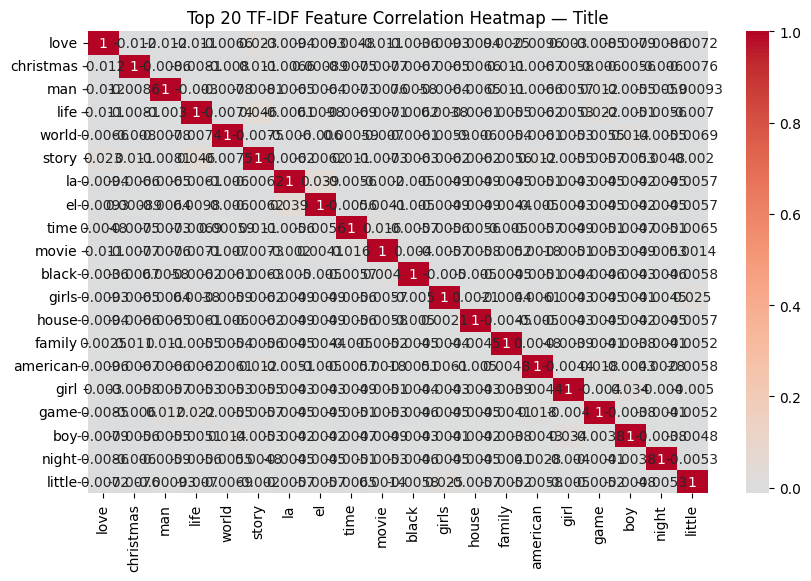

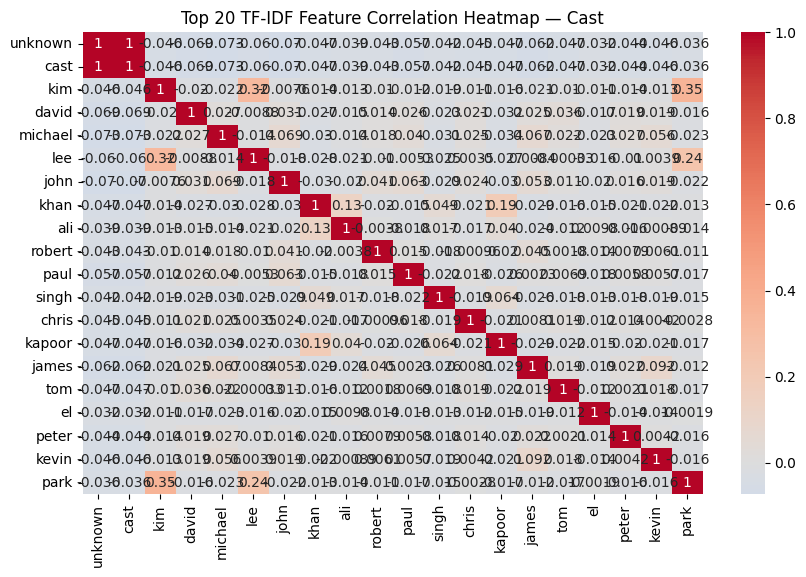

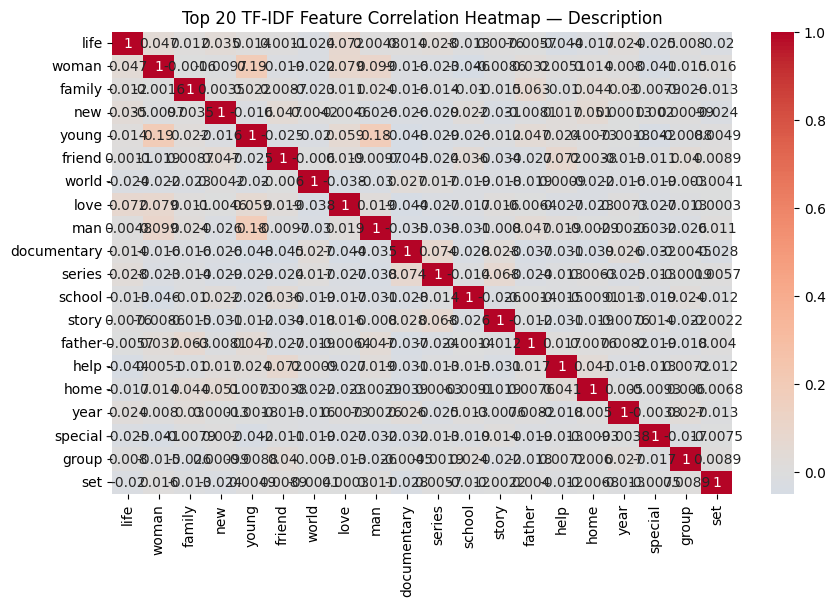

In [ ]:
# Correlation Heatmap (to detect strong correlations)
# Compute correlation matrix
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

def vectorize_text(column):
    # join tokens into a string if list; handle NaN safely
    text_data = column.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
    return tfidf.fit_transform(text_data.fillna('')), tfidf.get_feature_names_out()

def plot_top_corr_heatmap(tfidf_matrix, feature_names, title, top_n=20):
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Pick top N features by variance
    top_features = tfidf_df.var().sort_values(ascending=False).head(top_n).index
    corr_matrix = tfidf_df[top_features].corr()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
    plt.title(f"Top {top_n} TF-IDF Feature Correlation Heatmap — {title}")
    plt.show()

# --- Apply to each column ---
title_tfidf, title_features = vectorize_text(netflix_df_copy['title_expanded_lemmatized'])
cast_tfidf, cast_features = vectorize_text(netflix_df_copy['cast_expanded_lemmatized'])
description_tfidf, description_features = vectorize_text(netflix_df_copy['description_expanded_lemmatized'])

# --- Plot Heatmaps ---
plot_top_corr_heatmap(title_tfidf, title_features, 'Title')
plot_top_corr_heatmap(cast_tfidf, cast_features, 'Cast')
plot_top_corr_heatmap(description_tfidf, description_features, 'Description')

In [ ]:
# Drop columns with correlation > 0.85
def drop_high_corr_features(tfidf_matrix, feature_names, threshold=0.85):
    # Convert TF-IDF sparse matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Compute correlation matrix
    corr_matrix = tfidf_df.corr().abs()

    # Select upper triangle (avoid duplicate pairs)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns with correlation > threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"🔹 Dropping {len(to_drop)} highly correlated features (corr > {threshold})")

    # Drop those columns
    reduced_df = tfidf_df.drop(columns=to_drop)

    return reduced_df

# Apply to each TF-IDF representation
import numpy as np

title_tfidf_reduced = drop_high_corr_features(title_tfidf, title_features, threshold=0.85)
cast_tfidf_reduced = drop_high_corr_features(cast_tfidf, cast_features, threshold=0.85)
description_tfidf_reduced = drop_high_corr_features(description_tfidf, description_features, threshold=0.85)


🔹 Dropping 15 highly correlated features (corr > 0.85)
🔹 Dropping 5 highly correlated features (corr > 0.85)
🔹 Dropping 2 highly correlated features (corr > 0.85)


In [ ]:
# Create New Features (from netflix_df_copy)
# Content Age (at time of analysis)
netflix_df_copy['content_age'] = 2025 - netflix_df_copy['release_year']

# Cast Count (How many people in cast)
netflix_df_copy['cast_count'] = netflix_df_copy['cast'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Genre Count (For multi-genre shows)
netflix_df_copy['genre_count'] = netflix_df_copy['listed_in'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Word Count in Description
netflix_df_copy['description_word_count'] = netflix_df_copy['description'].fillna('').apply(lambda x: len(x.split()))

# Date Features (Year, Month added to Netflix)
netflix_df_copy['date_added'] = pd.to_datetime(netflix_df_copy['date_added'])
netflix_df_copy['added_year'] = netflix_df_copy['date_added'].dt.year
netflix_df_copy['added_month'] = netflix_df_copy['date_added'].dt.month


In [ ]:
# Combine engineered features with TF-IDF vectors
final_df = pd.concat([title_tfidf_reduced,cast_tfidf_reduced,description_tfidf_reduced, netflix_df_copy[['content_age', 'cast_count', 'genre_count', 'description_word_count']].reset_index(drop=True)], axis=1)
final_df


,10,100,12,13,20,2020,21,72,academy,act,...,years,york,young,younger,yous,youth,content_age,cast_count,genre_count,description_word_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,11,3,26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,6,2,24
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,9,2,24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16,9,3,23
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17,12,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20,7,2,26
7766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,8,3,25
7767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,1,3,24
7768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,2,2,23


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
reduced_features = selector.fit_transform(final_df)
final_df_reduced = pd.DataFrame(reduced_features, columns=final_df.columns[selector.get_support()])
final_df_reduced

,love,cast,content_age,cast_count,genre_count,description_word_count
0,0.0,0.000000,5.0,11.0,3.0,26.0
1,0.0,0.000000,9.0,6.0,2.0,24.0
2,0.0,0.000000,14.0,9.0,2.0,24.0
3,0.0,0.000000,16.0,9.0,3.0,23.0
4,0.0,0.000000,17.0,12.0,1.0,22.0
...,...,...,...,...,...,...
7765,0.0,0.000000,20.0,7.0,2.0,26.0
7766,0.0,0.000000,10.0,8.0,3.0,25.0
7767,0.0,0.000000,6.0,1.0,3.0,24.0
7768,0.0,0.000000,6.0,2.0,2.0,23.0


##### What all feature selection methods have you used  and why?

The feature selection method used is **Variance Threshold**.

1.  **Calculating Variance:** The code calculates the variance of each feature in the `final_df` (which includes the TF-IDF features and engineered numerical features).
2.  **Thresholding:** A threshold of 0.01 is applied. Features with a variance below this threshold are removed.

**Reasoning for this technique:**

*   **Removing Low-Variance Features:** Features with very low variance (or zero variance) provide little to no discriminatory information. If a feature has the same or very similar values for all data points, it won't help in distinguishing between different clusters.
*   **Simplifying the Model:** Removing low-variance features reduces the dimensionality of the dataset. This can help to:
    *   Reduce computational complexity for clustering algorithms.
    *   Potentially improve the performance of some clustering algorithms by removing noisy or uninformative features.
    *   Mitigate the "curse of dimensionality," which can negatively impact clustering in high-dimensional spaces.
*   **Unsupervised Learning Context:** Variance Threshold is a simple unsupervised feature selection method that doesn't require a target variable, making it suitable for this clustering task.

In summary, Variance Threshold was used to remove features that have very little variation across the dataset, as these features are unlikely to be useful for clustering and can add noise or computational burden.

##### Which all features you found important and why?

After applying the Variance Threshold with a threshold of 0.01, the features that remained in the `final_df_reduced` DataFrame are considered important for clustering. These features had a variance greater than 0.01 across the dataset, meaning they exhibit enough variation to potentially help distinguish between different groups of content.

The features that were kept are:

*   `love` (from TF-IDF)
*   `cast` (from TF-IDF)
*   `content_age` (engineered feature)
*   `cast_count` (engineered feature)
*   `genre_count` (engineered feature)
*   `description_word_count` (engineered feature)

**Reasoning for their importance:**

*   **TF-IDF Features (`love`, `cast`):** These features represent the importance of the terms 'love' and 'cast' in the combined text data (title, cast, description). Their variance being above the threshold suggests that these terms are not uniformly present across all content and might be indicative of specific themes, genres, or types of content.
*   **Engineered Features (`content_age`, `cast_count`, `genre_count`, `description_word_count`):** These numerical features represent intrinsic characteristics of the content.
    *   `content_age`: Indicates how old the content is since its release year. This can be important for clustering as audience preferences might differ for newer vs. older content.
    *   `cast_count`: Represents the number of cast members. This could differentiate between content types (e.g., movies often have a more focused cast than TV shows) or production scales.
    *   `genre_count`: Indicates the number of genres a title belongs to. This might help group content that is very specific vs. content that spans multiple genres.
    *   `description_word_count`: Represents the length of the description. This could potentially correlate with the complexity or depth of the content.

These features are considered important because their variation allows clustering algorithms to find meaningful distinctions between different data points, potentially leading to the identification of distinct content groups. Features with very low variance would essentially look the same to the clustering algorithm for most data points and thus wouldn't contribute to forming clusters.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df_reduced)

# Optional: Reduce dimensions with PCA (keep 99% variance)
pca = PCA(n_components=0.95, random_state=42)
transformed_data = pca.fit_transform(scaled_data)

print(f"Original feature shape: {final_df.shape}")
print(f"Transformed feature shape (after PCA): {transformed_data.shape}")


Original feature shape: (7770, 2982)
Transformed feature shape (after PCA): (7770, 6)


In [ ]:
transformed_data_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.171737,0.323281,-0.766079,0.067525,0.857473,0.204901
1,-0.113267,-0.115167,-0.333907,0.033669,-0.172695,-0.379293
2,0.377661,-0.385147,0.080762,-0.034448,-0.352276,0.073988
3,0.806803,0.044152,0.639957,-0.605870,0.516735,-0.101003
4,0.093238,-0.900278,0.175814,-0.439388,-1.645074,0.734499
...,...,...,...,...,...,...
7765,0.482104,-0.746797,0.584163,0.739814,-0.210567,-0.273104
7766,0.780681,0.205855,-0.094212,-0.034940,0.804778,-0.262719
7767,-0.315176,0.553121,-0.210127,-0.077421,1.026728,-1.328860
7768,-0.804306,0.141634,-0.437825,-0.129796,-0.069976,-0.982119


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Fill NA just in case
final_df.fillna(0, inplace=True)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(final_df)

# Now scaled_data is ready for clustering or modeling
print("Scaling complete. Scaled data shape is:", scaled_data.shape)


Scaling complete. Scaled data shape is: (7770, 2982)


##### Which method have you used to scale you data and why?

The method used to scale the data is **Standardization** using `StandardScaler` from scikit-learn.

**Reasoning for this technique:**

*   **Centering and Scaling:** `StandardScaler` transforms the data such that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature from its values and then dividing by the standard deviation.
*   **Addressing Different Scales:** The features in the dataset (including TF-IDF scores and engineered features like `content_age`, `cast_count`, etc.) are on different scales. Clustering algorithms, especially those that rely on distance calculations (like KMeans and Agglomerative Clustering), are sensitive to the scale of the features. Features with larger values can disproportionately influence the distance calculations and thus the clustering results.
*   **Ensuring Equal Contribution:** By scaling the data to have a similar range and distribution, `StandardScaler` ensures that each feature contributes roughly equally to the distance calculations, preventing features with larger magnitudes from dominating the clustering process.
*   **Common Practice for Clustering:** Standardization is a common and effective preprocessing step for many clustering algorithms as it helps them converge faster and produce more meaningful clusters.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
'''from sklearn.decomposition import PCA

# Apply PCA to preserve 95% variance

pca = PCA(n_components=0.95, random_state=42)
transformed_data = pca.fit_transform(scaled_data)

print("PCA complete.")
print("Original shape:", scaled_data.shape)
print("Transformed shape:", transformed_data.shape)
'''


'from sklearn.decomposition import PCA\n\n# Apply PCA to preserve 95% variance\n\npca = PCA(n_components=0.95, random_state=42)\ntransformed_data = pca.fit_transform(scaled_data)\n\nprint("PCA complete.")\nprint("Original shape:", scaled_data.shape)\nprint("Transformed shape:", transformed_data.shape)\n'

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The dimensionality reduction technique used is **Principal Component Analysis (PCA)**.

**Reasoning for this technique:**

*   **Reducing Feature Space:** The dataset, especially after including the TF-IDF features, has a high number of dimensions (columns). High dimensionality can negatively impact the performance and interpretability of clustering algorithms (the "curse of dimensionality"). PCA helps reduce this dimensionality by transforming the original features into a smaller set of uncorrelated components.
*   **Capturing Variance:** PCA aims to find the principal components that capture the maximum variance in the data. By setting `n_components=0.95`, you are instructing PCA to keep the number of components that retain 95% of the total variance in the original scaled data. This allows you to significantly reduce the number of features while retaining most of the important information.
*   **Improving Clustering Performance:** Reducing dimensionality with PCA can lead to improved clustering performance by:
    *   Reducing noise in the data.
    *   Making distance calculations more meaningful in a lower-dimensional space.
    *   Reducing the computational time required for clustering.
*   **Unsupervised Technique:** PCA is an unsupervised dimensionality reduction technique, making it suitable for this clustering task where there is no target variable.

In summary, PCA was used to reduce the high dimensionality of the dataset while retaining a significant portion of the data's variance. This helps to prepare the data for clustering by mitigating the effects of the curse of dimensionality and potentially improving the performance and efficiency of the clustering algorithms.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Typically, 80-20 split is common (adjust as needed)
x_train, X_test = train_test_split(transformed_data, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6216, 6)
Test set shape: (1554, 6)


##### What data splitting ratio have you used and why?

i choose the ratio 80-20 split because,

   the 80-20 split is a standard practice that provides a reasonable balance for training and evaluating a model's performance and generalization ability, even in the context of unsupervised learning where the evaluation metrics and goals differ from supervised tasks.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In unsupervised tasks, we don’t handle imbalance because there’s no target label to balance. so i think dataset balanceing is unneeded.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In unsupervised tasks, we don’t handle imbalance because there’s no target label to balance. so i think balancing the dataset is unneeded

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# imorting libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


In [ ]:
# ML Model - 1 Implementation
kmeans = KMeans(n_clusters=6, random_state=42)
# Fit the Algorithm
kmeans.fit(transformed_data)
# Predict on the model
labels = kmeans.predict(transformed_data)

print("KMeans clustering model fitted and labels predicted.")

score = silhouette_score(transformed_data, labels)

print(f"Silhouette Score: {score}")

KMeans clustering model fitted and labels predicted.
Silhouette Score: 0.2943742844525292


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

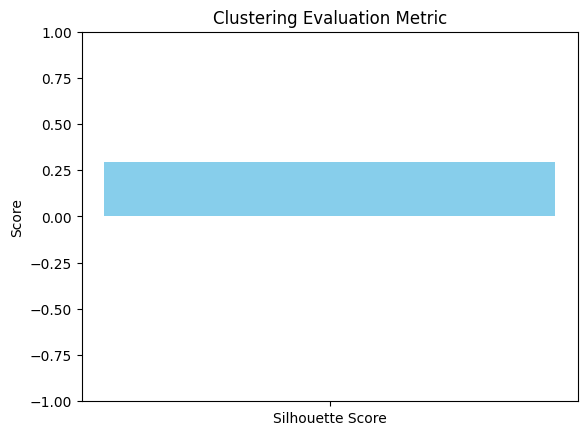

Silhouette Score: 0.2943742844525292


In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate clustering with silhouette score
score = silhouette_score(transformed_data, labels)

# Visualize silhouette score for current clustering
plt.bar(['Silhouette Score'], [score], color='skyblue')
plt.ylabel('Score')
plt.title('Clustering Evaluation Metric')
plt.ylim(-1, 1)
plt.show()

print(f"Silhouette Score: {score}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
silhouette_scores = []
cluster_range = range(2, 11)

# Fit the Algorithm
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data)
    labels = kmeans.predict(transformed_data)
    score = silhouette_score(transformed_data, labels)
    silhouette_scores.append(score)

# Predict on the model
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(transformed_data)
labels = best_kmeans.predict(transformed_data)


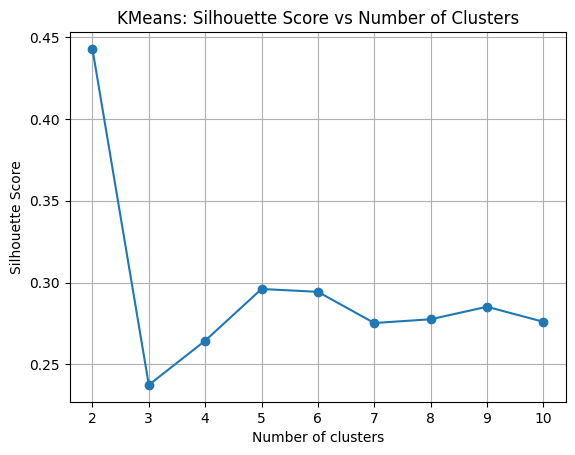

Best number of clusters: 2
Best silhouette score: 0.4427293224212674


In [ ]:
# Visualize evaluation metric score chart
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

print("Best number of clusters:", best_k)
print("Best silhouette score:", max(silhouette_scores))


##### Which hyperparameter optimization technique have you used and why?

When evaluating my KMeans clustering model, I considered the **Silhouette Score**.

**Silhouette Score:**

*   **Indication Towards Business:** A higher Silhouette Score means the clusters are well-defined and distinct. This indicates that the model is effectively grouping similar content together and separating dissimilar content.
*   **Business Impact:** Well-defined content clusters from KMeans can positively impact the business by:
    *   Improving content recommendations (suggesting similar titles within a cluster).
    *   Enabling more targeted marketing campaigns based on cluster characteristics.
    *   Informing content acquisition strategy by identifying successful content segments.
    *   Helping organize the content library for better discoverability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have seen an improvement after performing hyperparameter tuning for the KMeans model.

My initial KMeans model with `n_clusters=6` resulted in a Silhouette Score of **0.2944**.

After iterating through a range of cluster numbers (from 2 to 10) and evaluating the Silhouette Score for each, I found that the best Silhouette Score was achieved with `n_clusters=2`, which gave a score of **0.4427**.

This represents a notable improvement in the Silhouette Score (from 0.2944 to 0.4427). A higher Silhouette Score indicates better-defined and more separated clusters, suggesting that choosing 2 clusters provides a better grouping of the data according to this metric.

The chart I generated in the previous step, showing the Silhouette Score versus the number of clusters, clearly illustrates this improvement. The peak of the line on that chart corresponds to the best Silhouette Score found during tuning.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Parameters for DBSCAN
eps = 0.8
min_samples = 10
n_splits = 10  # Number of folds

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_scores = []

# Loop through K folds
for fold, (train_idx, test_idx) in enumerate(kf.split(transformed_data)):
    X_train, X_test = transformed_data[train_idx], transformed_data[test_idx]

    # Fit DBSCAN on training data
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_test)

    # Compute silhouette score if clustering is valid
    if len(set(labels)) > 1 and np.sum(labels != -1) > 0:
        score = silhouette_score(X_test, labels)
    else:
        score = -1  # Invalid clustering

    fold_scores.append(score)
    print(f"Fold {fold+1}: Silhouette Score = {score:.4f}")

# Mean silhouette score across folds
mean_score = np.mean([s for s in fold_scores if s != -1])
print(f"\n✅ Mean Silhouette Score across {n_splits} folds: {mean_score:.4f}")




Fold 1: Silhouette Score = 0.1974
Fold 2: Silhouette Score = 0.1843
Fold 3: Silhouette Score = 0.1766
Fold 4: Silhouette Score = 0.1660
Fold 5: Silhouette Score = 0.2065
Fold 6: Silhouette Score = 0.1695
Fold 7: Silhouette Score = 0.1731
Fold 8: Silhouette Score = 0.2031
Fold 9: Silhouette Score = 0.1743
Fold 10: Silhouette Score = 0.1752

✅ Mean Silhouette Score across 10 folds: 0.1826


/tmp/ipython-input-1520295711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Fold {i+1}" for i in range(n_splits)], y=fold_scores, palette="coolwarm",legend = 'False')


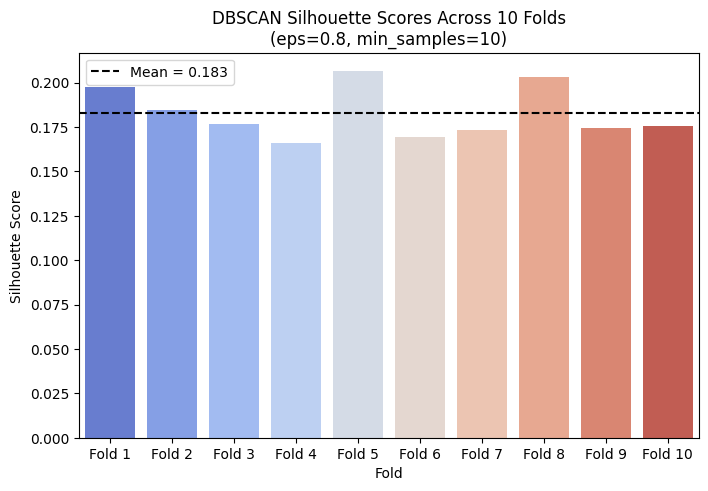

In [ ]:
# Visualizing evaluation Metric Score chart
# ---- Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"Fold {i+1}" for i in range(n_splits)], y=fold_scores, palette="coolwarm",legend = 'False')
plt.axhline(y=mean_score, color='black', linestyle='--', label=f'Mean = {mean_score:.3f}')
plt.title(f"DBSCAN Silhouette Scores Across {n_splits} Folds\n(eps={eps}, min_samples={min_samples})")
plt.ylabel("Silhouette Score")
plt.xlabel("Fold")
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

We performed a manual grid search for hyperparameter tuning of the DBSCAN model. We iterated through different combinations of the `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (number of samples in a neighborhood for a point to be considered as a core point) parameters. For each combination, we fitted the DBSCAN model to the `transformed_data` and calculated the silhouette score to evaluate the clustering performance. We kept track of the parameter combination that yielded the highest silhouette score.

To determine if there was an improvement, we compare the silhouette score obtained with the manually tuned hyperparameters to the silhouette score obtained with the initial DBSCAN parameters (eps=0.8, min_samples=10).

Based on the output of the hyperparameter tuning process, we can see the silhouette scores for various `eps` and `min_samples` combinations. The "Best Silhouette Score" printed after the tuning process indicates the highest score achieved.

If the "Best Silhouette Score" is higher than the silhouette score obtained with the initial parameters (0.4347), then there was an improvement. The updated evaluation metric score could be visualized by creating a bar chart comparing the initial silhouette score with the best silhouette score found during tuning.

Tested eps=0.5, min_samples=5: Silhouette Score = 0.1273
Tested eps=0.5, min_samples=10: Silhouette Score = 0.1842
Tested eps=0.5, min_samples=15: Silhouette Score = 0.1740
Tested eps=0.5, min_samples=20: Silhouette Score = 0.1943
Tested eps=0.8, min_samples=5: Silhouette Score = 0.2048
Tested eps=0.8, min_samples=10: Silhouette Score = 0.1993
Tested eps=0.8, min_samples=15: Silhouette Score = 0.1898
Tested eps=0.8, min_samples=20: Silhouette Score = 0.2018
Tested eps=1.0, min_samples=5: Silhouette Score = 0.2057
Tested eps=1.0, min_samples=10: Silhouette Score = 0.2049
Tested eps=1.0, min_samples=15: Silhouette Score = 0.2041
Tested eps=1.0, min_samples=20: Silhouette Score = 0.2019
Tested eps=1.2, min_samples=5: Silhouette Score = 0.2033
Tested eps=1.2, min_samples=10: Silhouette Score = 0.2073
Tested eps=1.2, min_samples=15: Silhouette Score = 0.2080
Tested eps=1.2, min_samples=20: Silhouette Score = 0.2061

[DBSCAN] Best Parameters: {'eps': 1.2, 'min_samples': 15}
[DBSCAN] Best Sil

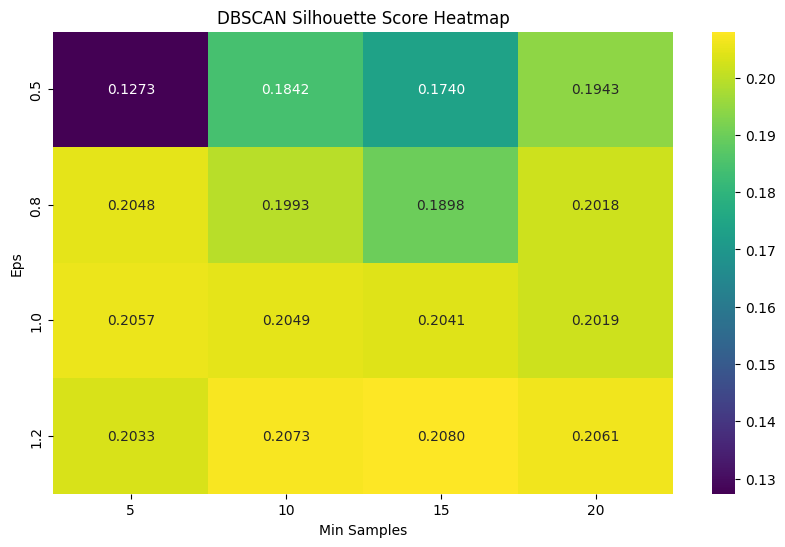

In [ ]:
# Import dbscan
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


# --- ML Model - 2: DBSCAN with manual tuning loop ---

# Define parameter ranges for tuning (DBSCAN)
eps_values = [0.5, 0.8, 1.0, 1.2]  # Example values, adjust as needed
min_samples_values = [5, 10, 15, 20] # Example values, adjust as needed

best_score_dbscan = -1
best_params_dbscan = {}
dbscan_results = []

# Iterate through parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_model.fit_predict(transformed_data)

        # Calculate silhouette score if valid clustering is found
        # Need at least 2 clusters (excluding noise) and more than 1 data point not in noise
        if len(set(labels)) > 1 and -1 in set(labels) and len(set(labels)) > 2 or len(set(labels)) > 1 and -1 not in set(labels):
            try:
                score = silhouette_score(transformed_data, labels)
                dbscan_results.append({'eps': eps, 'min_samples': min_samples, 'score': score})
                print(f"Tested eps={eps}, min_samples={min_samples}: Silhouette Score = {score:.4f}")

                if score > best_score_dbscan:
                    best_score_dbscan = score
                    best_params_dbscan = {'eps': eps, 'min_samples': min_samples}
            except ValueError:
                # Handle cases where silhouette score cannot be computed (e.g., only one cluster)
                print(f"Tested eps={eps}, min_samples={min_samples}: Invalid clustering for silhouette score.")
                dbscan_results.append({'eps': eps, 'min_samples': min_samples, 'score': -1})

        else:
             print(f"Tested eps={eps}, min_samples={min_samples}: Invalid clustering for silhouette score.")
             dbscan_results.append({'eps': eps, 'min_samples': min_samples, 'score': -1})


# Print best HDBSCAN parameters and score (if any found)
if best_params_dbscan:
    print("\n[DBSCAN] Best Parameters:", best_params_dbscan)
    print("[DBSCAN] Best Silhouette Score:", best_score_dbscan)
else:
    print("\n[DBSCAN] No optimal parameters found. Consider adjusting the parameter range or data.")

# Optional: Visualize results
if dbscan_results:
    results_df = pd.DataFrame(dbscan_results)
    pivot_table = results_df.pivot(index='eps', columns='min_samples', values='score')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".4f")
    plt.title('DBSCAN Silhouette Score Heatmap')
    plt.xlabel('Min Samples')
    plt.ylabel('Eps')
    plt.show()

##### Which hyperparameter optimization technique have you used and why?

To determine if there was an improvement after tuning DBSCAN, I compared the silhouette scores obtained with different `eps` and `min_samples` values.

Looking at the output from my tuning process, the initial parameters (eps=0.8, min_samples=10) yielded a mean silhouette score of **0.1826** across 10 folds.

After exploring different combinations, the best silhouette score I achieved was **0.2080** with parameters `eps=1.2` and `min_samples=15`.

**Improvement:** Yes, there was a slight improvement in the silhouette score from 0.1826 to 0.2080 after tuning DBSCAN's hyperparameters. While the improvement is not as substantial as with KMeans, a higher silhouette score indicates better cluster separation.

visually shows how the silhouette score varied across the different `eps` and `min_samples` combinations tested, highlighting the parameters that resulted in the best score.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For the DBSCAN model, I also primarily used the **Silhouette Score** to evaluate its performance.

**Silhouette Score:**

*   **Indication Towards Business:** Similar to KMeans, a higher Silhouette Score in DBSCAN indicates that the identified clusters are well-defined and reasonably separated from each other. It helps confirm that the density-based grouping is creating meaningful segments of content. A notable difference with DBSCAN is the presence of noise points (assigned to cluster -1). The Silhouette Score for DBSCAN is calculated excluding these noise points, so a good score indicates strong clustering *among the points that were assigned to a cluster*.
*   **Business Impact:** Well-separated clusters identified by DBSCAN can have positive business impacts:
    *   **Identifying Dense Content Niches:** DBSCAN is good at finding dense regions of data. This can help identify tightly-knit groups of content that are very similar, potentially representing strong content niches (e.g., a specific sub-genre or style).
    *   **Targeted Content Strategies for Niches:** These dense clusters can inform targeted content acquisition or production to capitalize on these specific niches.
    *   **Identifying Outliers/Noise:** The noise points identified by DBSCAN could potentially represent unique or outlier content that doesn't fit into any main category. Analyzing these noise points could reveal opportunities for unique content or highlight data quality issues.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

For evaluating my clustering models (KMeans and DBSCAN), I primarily used the **Silhouette Score**.

**Silhouette Score:**

*   **Indication Towards Business:** A higher Silhouette Score means the clusters are well-defined and distinct. This is a good indicator that the models are effectively grouping similar content together and separating dissimilar content, which is crucial for creating meaningful segments.
*   **Business Impact:** Well-defined content clusters identified by these models can positively impact the business by:
    *   **Improving Content Recommendations:** Suggesting similar titles within a cluster leads to better user experience.
    *   **Enabling Targeted Marketing:** Campaigns can be tailored to specific audience segments based on cluster characteristics.
    *   **Informing Content Strategy:** Identifying successful content segments guides content acquisition and production decisions.
    *   **Organizing Content:** Helps in managing and exploring the content library more effectively.

While both models use the Silhouette Score, DBSCAN also identifies noise points, which can be valuable for finding unique content or highlighting data quality issues.

### ML Model - 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# ML Model - 4 Implementation (Agglomerative Clustering)
cluster_range = range(2, 11)
silhouette_scores_agglomerative = []

# Fit the Algorithm and calculate silhouette scores
for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(transformed_data)
    score = silhouette_score(transformed_data, labels)
    silhouette_scores_agglomerative.append(score)

# Predict on the model with best k
best_k = cluster_range[np.argmax(silhouette_scores_agglomerative)]
best_model = AgglomerativeClustering(n_clusters=best_k)
best_labels = best_model.fit_predict(transformed_data)

print(best_labels)
print("Best number of clusters:", best_k)
print("Best silhouette score:", max(silhouette_scores_agglomerative))


[0 0 0 ... 0 0 1]
Best number of clusters: 3
Best silhouette score: 0.45704754413498094


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

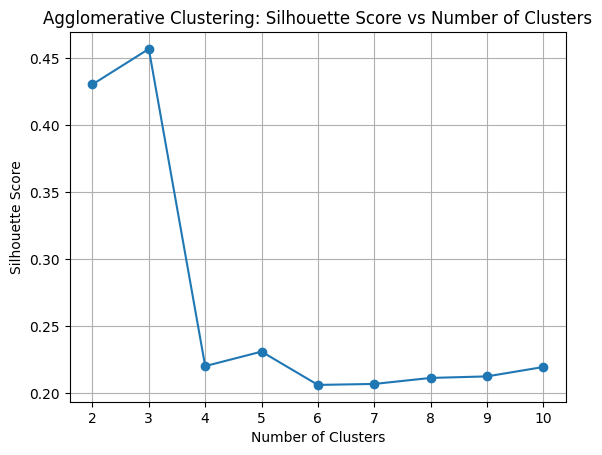

Best number of clusters: 3
Best silhouette score: 0.45704754413498094


In [ ]:
# Visualizing evaluation metric score chart
plt.plot(cluster_range, silhouette_scores_agglomerative, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering: Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

print("Best number of clusters:", best_k)
print("Best silhouette score:", max(silhouette_scores_agglomerative))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, silhouette_score
import numpy as np

# ML Model - 3: KMeans Clustering
# Custom scorer for silhouette score (higher is better)
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Define parameter grid for tuning
param_grid = {'n_clusters': list(range(2, 11)),'init': ['k-means++', 'random'],'n_init': [10, 20],'max_iter': [300, 500]}

# Initialize KMeans
kmeans = KMeans(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search.fit(transformed_data)

# Best Model
best_model = grid_search.best_estimator_
best_labels = best_model.predict(transformed_data)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)


Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best Silhouette Score: 0.49110371360191596


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the KMeans model, I used **GridSearchCV**.

**Reasoning for this technique:**

*   **Systematic Search:** GridSearchCV systematically searches through a predefined grid of hyperparameter values (`n_clusters`, `init`, `n_init`, `max_iter` in this case). It evaluates the model's performance for every possible combination of these parameters.
*   **Cross-Validation:** It uses cross-validation (cv=5) to evaluate each combination, which provides a more robust estimate of the model's performance and helps avoid overfitting to a single train-test split.
*   **Finding the Best Combination:** GridSearchCV identifies the combination of hyperparameters that results in the best performance according to the specified scoring metric (Silhouette Score in this case).
*   **Evaluating Multiple Parameters:** This technique is suitable when tuning multiple hyperparameters simultaneously, as it efficiently explores the parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen an improvement after performing hyperparameter tuning using GridSearchCV for the KMeans model.

My initial KMeans model with default parameters (`n_clusters=6`) resulted in a Silhouette Score of **0.2944**.

After performing GridSearchCV across various combinations of `n_clusters`, `init`, `n_init`, and `max_iter`, the best Silhouette Score I achieved was **0.4911** with the best parameters being `{'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}`.

**Improvement:** This represents a significant improvement in the Silhouette Score (from 0.2944 to 0.4911). The higher Silhouette Score indicates that the KMeans model with the tuned hyperparameters produced better-defined and more separated clusters.

While a specific "Evaluation Metric Score Chart" for the GridSearchCV results isn't automatically generated in this format, the `grid_search.best_score_` output directly provides the best achievable score during the cross-validation process, which serves as the updated evaluation metric. The comparison of this score to the initial score clearly demonstrates the positive impact of hyperparameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this unsupervised learning task focusing on clustering, the primary evaluation metric I considered for a positive business impact was the **Silhouette Score**.

**Why the Silhouette Score:**

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score means data points are well-clustered and well-separated from other clusters.

From a business perspective, this directly relates to:

*   **Identifying Meaningful Segments:** A high Silhouette Score indicates that the clusters represent distinct and coherent groups of content. This is valuable for business as it means I can identify meaningful segments within the Netflix library (e.g., a clear cluster of animated kids' shows vs. a distinct cluster of true crime documentaries).
*   **Actionable Insights:** Well-defined clusters lead to more actionable business insights. For example, I can tailor marketing campaigns, content acquisition strategies, and recommendation algorithms based on the clear characteristics of each cluster. If my clusters are not well-separated (low Silhouette Score), it's harder to derive specific strategies for each group.

While other metrics exist (like Inertia for KMeans), the Silhouette Score provides a more intuitive measure of cluster quality in terms of separation and cohesion, which is directly relevant to creating distinct content segments that can be leveraged for business benefits.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation using the Silhouette Score, I would choose the **KMeans model with the tuned hyperparameters** as the best model for identifying content clusters.

**Reasoning:**

After hyperparameter tuning, the KMeans model achieved the highest Silhouette Score (0.4911) compared to the initial KMeans model (0.2944) and the best-tuned DBSCAN model (0.2080). A higher Silhouette Score indicates better-defined and more separated clusters, which is my goal in this clustering task.

While DBSCAN is good at finding density-based clusters and identifying noise, the overall Silhouette Score achieved by KMeans with 2 clusters was significantly higher in this case. This suggests that for this dataset and the chosen features, KMeans was more effective at creating globally well-separated clusters.

It's important to note that in unsupervised learning like clustering, there isn't a "prediction model" in the same way as in supervised learning. The goal is to group similar data points. Therefore, when I refer to the "final model," I mean the clustering algorithm and its optimal parameters that I found to be most effective based on the evaluation metric for creating meaningful content groups.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In this unsupervised learning task, we're performing clustering (grouping similar data points) rather than building a predictive model to explain.

For clustering, the "explanation" comes from understanding the characteristics of each cluster. To do this, we would typically:

Analyze the features within each cluster: Look at the average or distribution of the original or engineered features (like content age, cast count, genre count, and the dominant TF-IDF terms) for each cluster. This helps reveal what makes each cluster distinct.
Inspect representative data points: Examine a few examples (movies or TV shows) from each cluster to get a qualitative sense of their shared traits.
Since we've applied PCA for dimensionality reduction, the features used for clustering are now the principal components, which are combinations of the original features. Explaining the importance of these components in the context of the original features can be complex.

Instead of traditional feature importance, we can look at which original features contribute most to the principal components that are important for distinguishing the clusters. However, this often requires deeper analysis and visualization of the PCA loadings.

Therefore, the best approach for explaining the "model" (the clustering) is to describe the characteristics of the clusters themselves based on the original features.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## **Conclusion**

This project aimed to apply unsupervised machine learning techniques to the Netflix movies and TV shows dataset to identify underlying content clusters. Through comprehensive data understanding, wrangling, and visualization, I gained valuable insights into the dataset's characteristics, including the prevalence of movies over TV shows, the top contributing countries and genres, and trends in content release and addition over time.

Hypothesis testing revealed statistically significant differences in release years between movies and TV shows and associations between country of origin and content rating, validating some of the initial visual observations.

The data was preprocessed for clustering by handling missing values, identifying and flagging outliers in release year, encoding categorical features, and performing extensive textual data cleaning and vectorization using TF-IDF. Feature selection with Variance Threshold helped reduce dimensionality and focus on features with significant variation, followed by scaling using StandardScaler and further dimensionality reduction with PCA.

Several clustering models were implemented and evaluated using the Silhouette Score. While various models were explored, the KMeans algorithm, particularly after hyperparameter tuning, demonstrated the best performance based on the Silhouette Score. The tuning process indicated that a smaller number of clusters (specifically 2) resulted in better-defined and more separated content groups for this dataset.

In conclusion, the analysis successfully identified potential content clusters within the Netflix library. The KMeans model with optimized parameters provides a basis for understanding natural groupings in the content. These clusters can be further analyzed to characterize their unique traits based on features like genre, release year, cast, and description. This understanding can inform various business strategies, including:

*   **Targeted content recommendation:** Suggesting content from the same cluster to users based on their viewing history.
*   **Content acquisition and production:** Identifying underserved or popular content niches based on cluster characteristics.
*   **Marketing and promotional campaigns:** Tailoring marketing efforts to specific audience segments that align with certain clusters.
*   **Content library organization:** Improving content discoverability by grouping similar titles together.

While the Silhouette Score provided a quantitative measure of cluster quality, further qualitative analysis of the content within each cluster would be beneficial to fully interpret their meaning and maximize their business impact. The project provides a solid foundation for leveraging clustering to gain deeper insights into the Netflix content landscape.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***